## Business Problem Overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. <br>
In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it <br>
costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

__Goal__ is to build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

### Steps:

- Analyse customer-level data of a leading telecom firm.
- Build predictive models to identify customers at high risk of churn.
- Identify the main indicators of churn.

## Import Libraries 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import datetime as dt
import os

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import class_weight ## Handle Imbalance using Class Weights
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA #Import PCA module
from sklearn.decomposition import IncrementalPCA
from sklearn.ensemble import RandomForestClassifier

!pip install xgboost
from xgboost import XGBClassifier

from datetime import datetime

!pip install mlxtend
from mlxtend.plotting import plot_confusion_matrix

!pip install imblearn
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

!pip install statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

!pip install openpyxl
!pip install Jinja2

!pip install shap
import shap

# settings for aesthetics
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_rows', 100)
pd.set_option('float_format', '{:f}'.format)
%matplotlib inline
sns.set_style('darkgrid')
style.use('fivethirtyeight')

np.random.seed(42)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# importing the data dictionary
dic = pd.read_excel("Data+Dictionary-+Telecom+Churn+Case+Study.xlsx",engine='openpyxl')

## Data Dictionary

In [ ]:
dic

Acronyms      \
0   MOBILE_NUMBER   
1       CIRCLE_ID   
2             LOC   
3             STD   
4              IC   
5              OG   
6             T2T   
7         T2M       
8         T2O       
9         T2F       
10        T2C       
11       ARPU       
12        MOU       
13        AON       
14       ONNET      
15     OFFNET       
16           ROAM   
17         SPL      
18        ISD       
19       RECH       
20        NUM       
21        AMT       
22        MAX       
23       DATA       
24         3G       
25         AV       
26        VOL       
27         2G       
28        PCK       
29      NIGHT       
30    MONTHLY       
31      SACHET      
32        *.6       
33        *.7       
34        *.8       
35        *.9       
36        FB_USER   
37        VBC       

                                                                          Descriptions  
0                                                                Customer phone number  
1                                 Telecom circle area to which the customer belongs to  
2                                             Local calls - within same telecom circle  
3                                               STD calls - outside the calling circle  
4                                                                       Incoming calls  
5                                                                       Outgoing calls  
6                        Operator T to T, i.e. within same operator (mobile to mobile)  
7                                                  Operator T to other operator mobile  
8                                              Operator T to other operator fixed line  
9                                                       Operator T to fixed lines of T  
10                                                  Operator T to it’s own call center  
11                                                            Average revenue per user  
12                                                      Minutes of usage - voice calls  
13        Age on network - number of days the customer is using the operator T network  
14                                  All kind of calls within the same operator network  
15                                    All kind of calls outside the operator T network  
16                          Indicates that customer is in roaming zone during the call  
17                                                                       Special calls  
18                                                                           ISD calls  
19                                                                            Recharge  
20                                                                              Number  
21                                                            Amount in local currency  
22                                                                             Maximum  
23                                                                     Mobile internet  
24                                                                          3G network  
25                                                                             Average  
26                                                Mobile internet usage volume (in MB)  
27                                                                          2G network  
28                                              Prepaid service schemes called - PACKS  
29                                      Scheme to use during specific night hours only  
30                                 Service schemes with validity equivalent to a month  
31                                  Service schemes with validity smaller than a month  
32                                                           KPI for the month of June  
33                                                           KPI for the month of July  
34                                                         KPI for the

In [ ]:
#Read the telecom churn csv file
telecom_churn_df = pd.read_csv("./telecom_churn_data.csv")

In [ ]:
telecom_churn_df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109        0.000000        0.000000        0.000000   
1     7001865778        109        0.000000        0.000000        0.000000   
2     7001625959        109        0.000000        0.000000        0.000000   
3     7001204172        109        0.000000        0.000000        0.000000   
4     7000142493        109        0.000000        0.000000        0.000000   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9     arpu_6  ...  sachet_3g_9  fb_user_6  fb_user_7  \
0            9/30/2014 197.385000  ...            0   1.000000   1.000000   
1            9/30/2014  34.047000  ...            0        nan   1.000000   
2            9/30/2014 167.690000  ...            0        nan        nan   
3            9/30/2014 221.338000  ...            0        nan        nan   
4            9/30/2014 261.636000  ...            0   0.000000        nan   

   fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0   1.000000        nan   968   30.400000    0.000000  101.200000    3.580000  
1   1.000000        nan  1006    0.000000    0.000000    0.000000    0.000000  
2        nan   1.000000  1103    0.000000    0.000000    4.170000    0.000000  
3        nan        nan  2491    0.000000    0.000000    0.000000    0.000000  
4        nan        nan  1526    0.000000    0.000000    0.000000    0.000000  

[5 rows x 226 columns]

## Data Cleaning

In [ ]:
telecom_churn_df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mobile_number             99999 non-null  int64  
 1   circle_id                 99999 non-null  int64  
 2   loc_og_t2o_mou            98981 non-null  float64
 3   std_og_t2o_mou            98981 non-null  float64
 4   loc_ic_t2o_mou            98981 non-null  float64
 5   last_date_of_month_6      99999 non-null  object 
 6   last_date_of_month_7      99398 non-null  object 
 7   last_date_of_month_8      98899 non-null  object 
 8   last_date_of_month_9      98340 non-null  object 
 9   arpu_6                    99999 non-null  float64
 10  arpu_7                    99999 non-null  float64
 11  arpu_8                    99999 non-null  float64
 12  arpu_9                    99999 non-null  float64
 13  onnet_mou_6               96062 non-null  float64
 14  onnet

We are having 225 columns and 99999 rows of data.

All of the date columns have been incorrectly interpreted as Object Types.

In [ ]:
# Remove Mobile Number
telecom_churn_df.drop(['mobile_number'],axis=1,inplace=True)

In [ ]:
# Convert all Object Type columns to Datetime
date_cols_df = telecom_churn_df.select_dtypes('object')
date_cols = date_cols_df.columns

In [ ]:
# Convert to Datetime
for col in date_cols:
    date_cols_df[col] = pd.to_datetime(date_cols_df[col],errors='ignore')

In [ ]:
print(f'Columns which have been interpreted as Object Type by Pandas but are DateTime : \n{os.linesep.join(date_cols)}')

Columns which have been interpreted as Object Type by Pandas but are DateTime : 
last_date_of_month_6
last_date_of_month_7
last_date_of_month_8
last_date_of_month_9
date_of_last_rech_6
date_of_last_rech_7
date_of_last_rech_8
date_of_last_rech_9
date_of_last_rech_data_6
date_of_last_rech_data_7
date_of_last_rech_data_8
date_of_last_rech_data_9


In [ ]:
# Merge datetime adjusted columns with the original dataframe
telecom_churn_df[date_cols] = date_cols_df

In [ ]:
telecom_churn_df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 225 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   circle_id                 99999 non-null  int64         
 1   loc_og_t2o_mou            98981 non-null  float64       
 2   std_og_t2o_mou            98981 non-null  float64       
 3   loc_ic_t2o_mou            98981 non-null  float64       
 4   last_date_of_month_6      99999 non-null  datetime64[ns]
 5   last_date_of_month_7      99398 non-null  datetime64[ns]
 6   last_date_of_month_8      98899 non-null  datetime64[ns]
 7   last_date_of_month_9      98340 non-null  datetime64[ns]
 8   arpu_6                    99999 non-null  float64       
 9   arpu_7                    99999 non-null  float64       
 10  arpu_8                    99999 non-null  float64       
 11  arpu_9                    99999 non-null  float64       
 12  onnet_mou_6      

Now all the columns are of correct data types.

### Remove Columns with a Single Unique Value (Zero Variance)

In [ ]:
# Find and Remove Columns with Zero Variance or Constant Columns

zero_var_columns = []
for col in telecom_churn_df.columns:
    if telecom_churn_df[col].nunique() == 1:
        zero_var_columns.append(col)

print(f'Columns which have been identified as Zero Variance Columns are: \n{os.linesep.join(zero_var_columns)}')

Columns which have been identified as Zero Variance Columns are: 
circle_id
loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
last_date_of_month_6
last_date_of_month_7
last_date_of_month_8
last_date_of_month_9
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_og_t2c_mou_9
std_ic_t2o_mou_6
std_ic_t2o_mou_7
std_ic_t2o_mou_8
std_ic_t2o_mou_9


In [ ]:
telecom_churn_df.drop(zero_var_columns,axis=1,inplace=True)

In [ ]:
telecom_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 209 entries, arpu_6 to sep_vbc_3g
dtypes: datetime64[ns](8), float64(168), int64(33)
memory usage: 159.5 MB



We now have 209 columns.

### Handle Missing Values

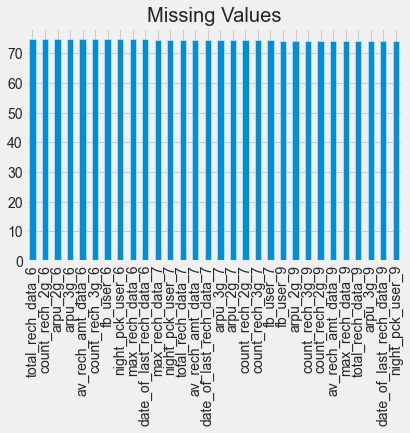

In [ ]:
# Finding and Handling Missing Values 

def find_missing_values(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/len(df.index))*100
    percent = round(percent,2)
    missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
    plt.title('Missing Values')
  
    return missing_data

missing_data = find_missing_values(telecom_churn_df)
missing_data['Percent'].head(30).plot.bar()
plt.show()

missing_data.head(50).style.background_gradient(cmap='Blues')

In [ ]:
#Columns having 0-5% null values
na_5 = missing_data[(missing_data['Percent']<=5.000) & (missing_data['Percent']>00.00)]

In [ ]:
#Columns having 5-10% null values
na_10 = missing_data[(missing_data['Percent']<=10.000) & (missing_data['Percent']>05.00)]

In [ ]:
#Columns having more than 70% null values
na_70 = missing_data[(missing_data['Percent']>=70.00)]

In [ ]:
#Check for columns having between 10-70% null values
missing_data[(missing_data['Percent']>10.000) & (missing_data['Percent']<70.000)]

Empty DataFrame
Columns: [Total, Percent]
Index: []

#### It can be seen that there are no columns with 10-70% Null values

In [ ]:
print(f'Number of columns which have more than 70% null values: \n{missing_data[missing_data.Percent>70.000].count()[0]}')

Number of columns which have more than 70% null values: 
40


In [ ]:
#Check unique values of each column having null values greater than 70%
print("date_of_last_rech_data_6 --", telecom_churn_df.date_of_last_rech_data_6.unique())
print("date_of_last_rech_data_7 --", telecom_churn_df.date_of_last_rech_data_7.unique())
print("date_of_last_rech_data_8 --", telecom_churn_df.date_of_last_rech_data_8.unique())
print("date_of_last_rech_data_9 --", telecom_churn_df.date_of_last_rech_data_9.unique())
print("-"*100)
print("count_rech_2g_6 --", telecom_churn_df.count_rech_2g_6.unique())
print("count_rech_2g_7 --", telecom_churn_df.count_rech_2g_7.unique())
print("count_rech_2g_8 --", telecom_churn_df.count_rech_2g_8.unique())
print("count_rech_2g_9 --", telecom_churn_df.count_rech_2g_9.unique())
print("-"*100)
print("count_rech_3g_6 --", telecom_churn_df.count_rech_3g_6.unique())
print("count_rech_3g_7 --", telecom_churn_df.count_rech_3g_7.unique())
print("count_rech_3g_8 --", telecom_churn_df.count_rech_3g_8.unique())
print("count_rech_3g_9 --", telecom_churn_df.count_rech_3g_9.unique())
print("-"*100)
print("total_rech_data_6 --", telecom_churn_df.total_rech_data_6.unique())
print("total_rech_data_7 --", telecom_churn_df.total_rech_data_7.unique())
print("total_rech_data_8 --", telecom_churn_df.total_rech_data_8.unique())
print("total_rech_data_9 --", telecom_churn_df.total_rech_data_9.unique())
print("-"*100)
print("max_rech_data_6 --", telecom_churn_df.max_rech_data_6.unique())
print("max_rech_data_7 --", telecom_churn_df.max_rech_data_7.unique())
print("max_rech_data_8 --", telecom_churn_df.max_rech_data_8.unique())
print("max_rech_data_9 --", telecom_churn_df.max_rech_data_9.unique())
print("-"*100)
print("arpu_2g_6 --", telecom_churn_df.arpu_2g_6.unique())
print("arpu_2g_7 --", telecom_churn_df.arpu_2g_7.unique())
print("arpu_2g_8 --", telecom_churn_df.arpu_2g_8.unique())
print("arpu_2g_9 --", telecom_churn_df.arpu_2g_9.unique())
print("-"*100)
print("arpu_3g_6 --", telecom_churn_df.arpu_3g_6.unique())
print("arpu_3g_7 --", telecom_churn_df.arpu_3g_7.unique())
print("arpu_3g_8 --", telecom_churn_df.arpu_3g_8.unique())
print("arpu_3g_9 --", telecom_churn_df.arpu_3g_9.unique())
print("-"*100)
print("night_pck_user_6 --", telecom_churn_df.night_pck_user_6.unique())
print("night_pck_user_7 --", telecom_churn_df.night_pck_user_7.unique())
print("night_pck_user_8--", telecom_churn_df.night_pck_user_8.unique())
print("night_pck_user_9 --", telecom_churn_df.night_pck_user_9.unique())
print("-"*100)
print("fb_user_6 --", telecom_churn_df.fb_user_6.unique())
print("fb_user_7 --", telecom_churn_df.fb_user_7.unique())
print("fb_user_8 --", telecom_churn_df.fb_user_8.unique())
print("fb_user_9 --", telecom_churn_df.fb_user_9.unique())
print("-"*100)

date_of_last_rech_data_6 -- ['2014-06-21T00:00:00.000000000'                           'NaT'
 '2014-06-04T00:00:00.000000000' '2014-06-27T00:00:00.000000000'
 '2014-06-30T00:00:00.000000000' '2014-06-06T00:00:00.000000000'
 '2014-06-02T00:00:00.000000000' '2014-06-12T00:00:00.000000000'
 '2014-06-19T00:00:00.000000000' '2014-06-29T00:00:00.000000000'
 '2014-06-05T00:00:00.000000000' '2014-06-17T00:00:00.000000000'
 '2014-06-11T00:00:00.000000000' '2014-06-25T00:00:00.000000000'
 '2014-06-10T00:00:00.000000000' '2014-06-20T00:00:00.000000000'
 '2014-06-23T00:00:00.000000000' '2014-06-13T00:00:00.000000000'
 '2014-06-26T00:00:00.000000000' '2014-06-16T00:00:00.000000000'
 '2014-06-14T00:00:00.000000000' '2014-06-24T00:00:00.000000000'
 '2014-06-28T00:00:00.000000000' '2014-06-15T00:00:00.000000000'
 '2014-06-09T00:00:00.000000000' '2014-06-22T00:00:00.000000000'
 '2014-06-01T00:00:00.000000000' '2014-06-08T00:00:00.000000000'
 '2014-06-07T00:00:00.000000000' '2014-06-18T00:00:00.00000000

In [ ]:
#As Night pack user and fb user columns have only 0 and 1s. Let's impute by adding min value
for column in telecom_churn_df.filter(regex ='user').columns:
    telecom_churn_df[column].replace(np.nan, 0, inplace = True)

In [ ]:
# drop column with > 70% missing values
telecom_churn_df.drop(na_70.index, axis=1, inplace=True)

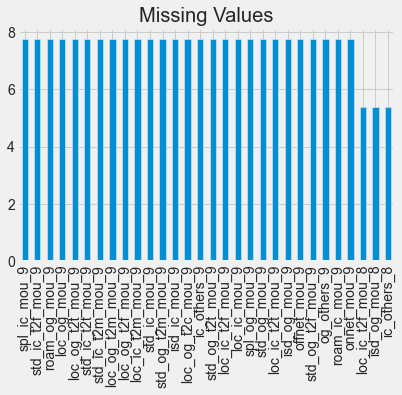

In [ ]:
#After imputing all the variables having null values more than 70%, let's verify the null values 
missing_data = find_missing_values(telecom_churn_df)
missing_data['Percent'].head(30).plot.bar()
plt.show()

missing_data.head(50).style.background_gradient(cmap='Blues')

We are now left with columns which have less than 10% missing data. 

In [ ]:
#impute date columns
date_columns = telecom_churn_df.filter(regex ='date').columns

In [ ]:
for d in date_columns:
    # telecom_churn_df[d] = pd.to_datetime(telecom_churn_df[d]).dt.day
    telecom_churn_df[d].fillna(telecom_churn_df[d].max(), inplace=True)

### Impute columns where nan values % is less than 10

In [ ]:
print(f'There are {len(missing_data[missing_data.Percent > 0])} columns with less than 10% missing values.')

There are 112 columns with less than 10% missing values.


In [ ]:
telecom_churn_df.fillna(0,inplace=True)

*******

## Feature Engineering / Derived Metrics

In [ ]:
# Find out ratio of revenue on happy/action phase
telecom_churn_df['arpu_ratio'] = ((telecom_churn_df.arpu_6 + telecom_churn_df.arpu_7)/2)/[1 if x ==0 else x for x in telecom_churn_df.arpu_8]

In [ ]:
# Find out if customer centre call were made more in action phase
telecom_churn_df['call_centre_ratio'] = ((telecom_churn_df.loc_og_t2c_mou_6 + telecom_churn_df.loc_og_t2c_mou_7)/2)/[1 if x ==0 else x for x in telecom_churn_df.loc_og_t2c_mou_8]

In [ ]:
# Find out ratio of usage from other network
telecom_churn_df['network_usage_diff'] = (telecom_churn_df.onnet_mou_8) - ( telecom_churn_df.offnet_mou_8)
# Find out ratio of usage from other network
telecom_churn_df['network_usage_diff_good'] = (telecom_churn_df.onnet_mou_6 + telecom_churn_df.onnet_mou_7 - telecom_churn_df.offnet_mou_6 - telecom_churn_df.offnet_mou_6)/2

In [ ]:
# Find ratio of good/action for 2g
telecom_churn_df['2g_usage_ratio'] = ((telecom_churn_df.vol_2g_mb_6 + telecom_churn_df.vol_2g_mb_7)/2)/[1 if x ==0 else x for x in telecom_churn_df.vol_2g_mb_8]

In [ ]:

# Find ratio of good/action for 3g
telecom_churn_df['3g_usage_ratio'] = ((telecom_churn_df.vol_3g_mb_6 + telecom_churn_df.vol_3g_mb_7)/2)/[1 if x ==0 else x for x in telecom_churn_df.vol_3g_mb_8]

In [ ]:
# Find ratio of good/action for outgoing call
telecom_churn_df['og_ratio'] = ((telecom_churn_df.total_og_mou_6 + telecom_churn_df.total_og_mou_7)/2)/[1 if x ==0 else x for x in telecom_churn_df.total_og_mou_8]

In [ ]:
# Find ratio of good/action for incoming call
telecom_churn_df['ic_ratio'] = ((telecom_churn_df.total_ic_mou_6 + telecom_churn_df.total_ic_mou_7)/2)/[1 if x ==0 else x for x in telecom_churn_df.total_ic_mou_8]

In [ ]:

# Find ratio of good/action for vbc
telecom_churn_df['vbc_difference'] = ((telecom_churn_df.jun_vbc_3g + telecom_churn_df.jul_vbc_3g)/2) - [1 if x ==0 else x for x in telecom_churn_df.aug_vbc_3g]

In [ ]:
telecom_churn_df['months_on_network'] = telecom_churn_df.aon / 30
telecom_churn_df.drop('aon',axis=1,inplace=True)

In [ ]:
# Derived Features from the date columns
def calculate_days_between_recharges(date_month_2 , date_month_1):
    
    days = (date_month_2 - date_month_1).dt.days
    return days

In [ ]:
# Include new derived columns and drop original last recharge date features

telecom_churn_df['days_between_rech_7_6'] = calculate_days_between_recharges(telecom_churn_df.date_of_last_rech_7,telecom_churn_df.date_of_last_rech_6)

telecom_churn_df['days_between_rech_8_7'] = calculate_days_between_recharges(telecom_churn_df.date_of_last_rech_8,telecom_churn_df.date_of_last_rech_7)

telecom_churn_df.drop(['date_of_last_rech_7','date_of_last_rech_6','date_of_last_rech_8','date_of_last_rech_9',],axis=1,inplace=True)

In [ ]:
# Reduces the memory of the dataframe
def reduce_mem_usage(props):
    start_mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    NAlist = [] # Keeps track of columns that have missing values filled in. 
    for col in props.columns:
        if props[col].dtype != object:  # Exclude strings
            
            # Print current column type
            print("******************************")
            print("Column: ",col)
            print("dtype before: ",props[col].dtype)
            
            # make variables for Int, max and min
            IsInt = False
            mx = props[col].max()
            mn = props[col].min()
            
            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(props[col]).all(): 
                NAlist.append(col)
                props[col].fillna(mn-1,inplace=True)  
                   
            # test if column can be converted to an integer
            asint = props[col].fillna(0).astype(np.int64)
            result = (props[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True

            
            # Make Integer/unsigned Integer datatypes
            if IsInt:
                if mn >= 0:
                    if mx < 255:
                        props[col] = props[col].astype(np.uint8)
                    elif mx < 65535:
                        props[col] = props[col].astype(np.uint16)
                    elif mx < 4294967295:
                        props[col] = props[col].astype(np.uint32)
                    else:
                        props[col] = props[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                        props[col] = props[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                        props[col] = props[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        props[col] = props[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        props[col] = props[col].astype(np.int64)    
            
            # Make float datatypes 32 bit
            else:
                props[col] = props[col].astype(np.float32)
            
            # Print new column type
            print("dtype after: ",props[col].dtype)
            print("******************************")
    
    # Print final result
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return props, NAlist

In [ ]:
telecom_churn_df, _ = reduce_mem_usage(telecom_churn_df)

Memory usage of properties dataframe is : 134.276123046875  MB
******************************
Column:  arpu_6
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  arpu_7
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  arpu_8
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  arpu_9
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  onnet_mou_6
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  onnet_mou_7
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  onnet_mou_8
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  onnet_mou_9
dtype bef

dtype after:  float32
******************************
******************************
Column:  og_others_8
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  og_others_9
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  total_og_mou_6
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  total_og_mou_7
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  total_og_mou_8
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  total_og_mou_9
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  loc_ic_t2t_mou_6
dtype before:  float64
dtype after:  float32
******************************
******************************
Col

dtype after:  uint8
******************************
******************************
Column:  monthly_2g_7
dtype before:  int64
dtype after:  uint8
******************************
******************************
Column:  monthly_2g_8
dtype before:  int64
dtype after:  uint8
******************************
******************************
Column:  monthly_2g_9
dtype before:  int64
dtype after:  uint8
******************************
******************************
Column:  sachet_2g_6
dtype before:  int64
dtype after:  uint8
******************************
******************************
Column:  sachet_2g_7
dtype before:  int64
dtype after:  uint8
******************************
******************************
Column:  sachet_2g_8
dtype before:  int64
dtype after:  uint8
******************************
******************************
Column:  sachet_2g_9
dtype before:  int64
dtype after:  uint8
******************************
******************************
Column:  monthly_3g_6
dtype before:  int64
dtyp

### Find the High Value Customer

The high value customers are those who have an average spend over the 70th percentile in the 6th and 7th months (good phase).

In [ ]:
telecom_churn_df.head()

arpu_6     arpu_7     arpu_8     arpu_9  onnet_mou_6  onnet_mou_7  \
0 197.384995 214.815994 213.802994  21.100000     0.000000     0.000000   
1  34.047001 355.074005 268.321014  86.285004    24.110001    78.680000   
2 167.690002 189.057999 210.225998 290.713989    11.540000    55.240002   
3 221.337997 251.102005 508.053986 389.500000    99.910004    54.389999   
4 261.635986 309.876007 238.173996 163.425995    50.310001   149.440002   

   onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  ...  \
0     0.000000     0.000000      0.000000      0.000000  ...   
1     7.680000    18.340000     15.740000     99.839996  ...   
2    37.259998    74.809998    143.330002    220.589996  ...   
3   310.980011   241.710007    123.309998    109.010002  ...   
4    83.889999    58.779999     76.959999     91.879997  ...   

   network_usage_diff  network_usage_diff_good  2g_usage_ratio  \
0            0.000000                 0.000000        2.734783   
1         -297.079987                35.654999        0.147851   
2         -171.100006              -109.940002        0.000000   
3          239.300003               -46.160000        0.000000   
4          -40.369999                22.915001        0.000000   

   3g_usage_ratio  og_ratio  ic_ratio  vbc_difference  months_on_network  \
0        1.068926  0.000000  0.000000       20.200001          32.266666   
1        0.000000  0.350211  0.154815       -1.000000          33.533333   
2        0.000000  0.995358  1.125952        1.085000          36.766666   
3        0.000000  0.508986  4.674290       -1.000000          83.033333   
4        0.000000  0.885401  0.612039       -1.000000          50.866665   

   days_between_rech_7_6  days_between_rech_8_7  
0                     25                     23  
1                     32                     28  
2                     37                     21  
3                     33                     31  
4                     32                     12  

[5 rows x 176 columns]

### In this case study, since we are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

#### Get total avg recharge amount for 6th and 7th months - Good phase

In [ ]:
telecom_churn_df['avg_rech_good_phase'] = ( telecom_churn_df.total_rech_amt_6  + telecom_churn_df.total_rech_amt_7 ) / 2 

In [ ]:
cutoff = telecom_churn_df.avg_rech_good_phase.quantile(0.7)

In [ ]:
print(f'The cutoff for average recharge in case of high value customer is: {cutoff} ')

The cutoff for average recharge in case of high value customer is: 368.5 


### Fetching High Value customer of more than 70th percentile(inclusive) of data set

In [ ]:
high_value_customers_df = telecom_churn_df[telecom_churn_df.avg_rech_good_phase >= cutoff]
print(high_value_customers_df.shape)

(30011, 177)


### Tag churners and remove attributes of the churn phase

Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.<br>
The attributes you need to use to tag churners are:

-   total_ic_mou_9

-   total_og_mou_9

-   vol_2g_mb_9

-   vol_3g_mb_9


In [ ]:
def tag_churned_customers(row):
    if ((row.total_ic_mou_9 ==0.0) and (row.total_og_mou_9 == 0.0)) \
       and ((row.vol_2g_mb_9 == 0.0) and (row.vol_3g_mb_9 == 0.0)) :
       return 1
    else:
        return 0
high_value_customers_df['churn']  = high_value_customers_df.apply(lambda x: tag_churned_customers(x),axis=1)

In [ ]:
high_value_customers_df['churn'].value_counts(normalize=True)*100

0   91.359835
1    8.640165
Name: churn, dtype: float64

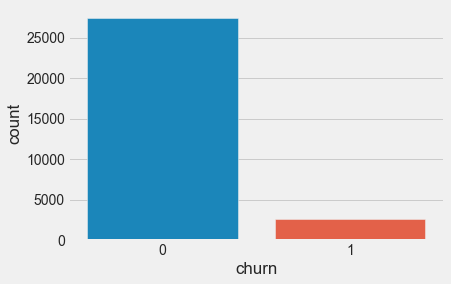

In [ ]:
sns.countplot(high_value_customers_df.churn)
plt.show()

As can be seen from the plot above, only `8.64 %` of High value customers have churned. This dataset is highly imbalanced for a Supervised ML use case. 

### Remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [ ]:
high_value_customers_df = high_value_customers_df.loc[:,~high_value_customers_df.columns.str.endswith('_9')]

high_value_customers_df.reset_index(drop=True,inplace=True)
high_value_customers_df.head()

arpu_6      arpu_7      arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0 1069.180054 1349.849976 3171.479980    57.840000    54.680000    52.290001   
1  378.721008  492.222992  137.362000   413.690002   351.029999    35.080002   
2  492.846008  205.671005  593.260010   501.760010   108.389999   534.239990   
3  430.975006  299.868988  187.893997    50.509998    74.010002    70.610001   
4  690.007996   18.980000   25.499001  1185.910034     9.280000     7.790000   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  \
0    453.429993    567.159973    325.910004      16.230000  ...   
1     94.660004     80.629997    136.479996       0.000000  ...   
2    413.309998    119.279999    482.459991      23.530001  ...   
3    296.290009    229.740005    162.759995       0.000000  ...   
4     61.639999      0.000000      5.540000       0.000000  ...   

   2g_usage_ratio  3g_usage_ratio   og_ratio  ic_ratio  vbc_difference  \
0        0.000000        0.000000   1.566098  1.381373      -38.680000   
1     5933.333496       31.446817   2.739625  4.000907      495.375000   
2        0.000000        0.000000   0.541487  0.498541       -1.000000   
3        0.000000        0.000000   1.355772  1.267439       11.170000   
4        0.000000        0.000000 625.169983 47.095001       -1.000000   

   months_on_network  days_between_rech_7_6  days_between_rech_8_7  \
0          26.733334                     28                     32   
1          10.500000                     36                     30   
2          86.900002                     32                     39   
3          17.033333                     31                     14   
4          22.233334                     30                     26   

   avg_rech_good_phase  churn  
0          1185.000000      1  
1           519.000000      0  
2           380.000000      0  
3           459.000000      0  
4           408.000000      0  

[5 rows x 138 columns]

# Exploratory Data Analysis

In [ ]:
# checking variance to see which columns hold most information
round(100*(np.var(high_value_customers_df)/np.var(high_value_customers_df).sum()), 2).sort_values().tail()

total_og_mou_8    2.940000
vol_3g_mb_7       4.570000
vol_3g_mb_8       4.610000
vol_3g_mb_6       4.680000
arpu_ratio       12.820000
dtype: float64

# Univariate analysis

In [ ]:
def box_plot_for_feature(df,feature_without_month):
    plt.figure(figsize=(18,7))
    plt.subplot(1,3,1)
    sns.boxplot(data = df, y = feature_without_month+'_6' ,x="churn",hue="churn",showfliers=False)

    plt.subplot(1,3,2)
    sns.boxplot(data = df, y = feature_without_month+'_7' ,x="churn",hue="churn",showfliers=False)

    plt.subplot(1,3,3)
    sns.boxplot(data = df, y = feature_without_month+'_8' ,x="churn",hue="churn",showfliers=False)

    plt.show()

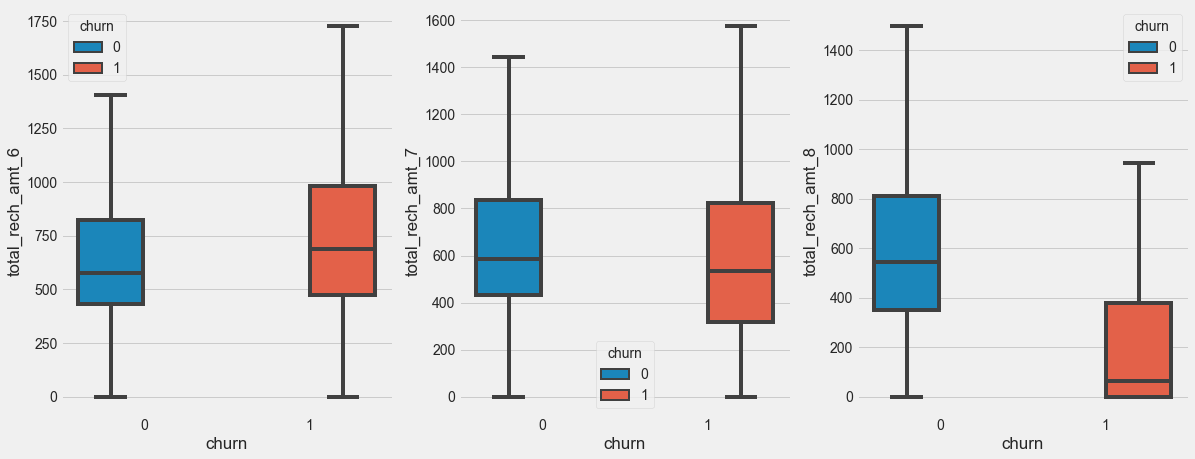

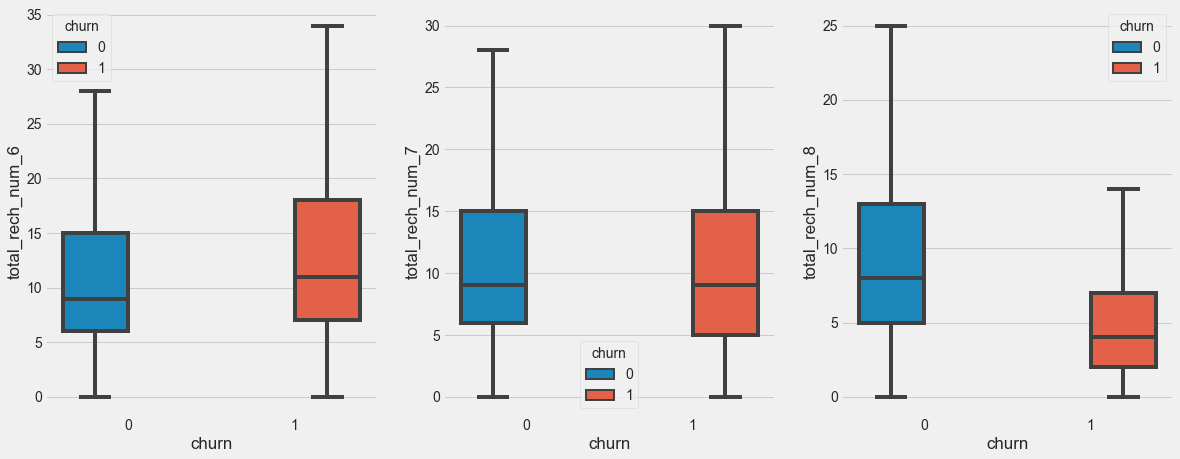

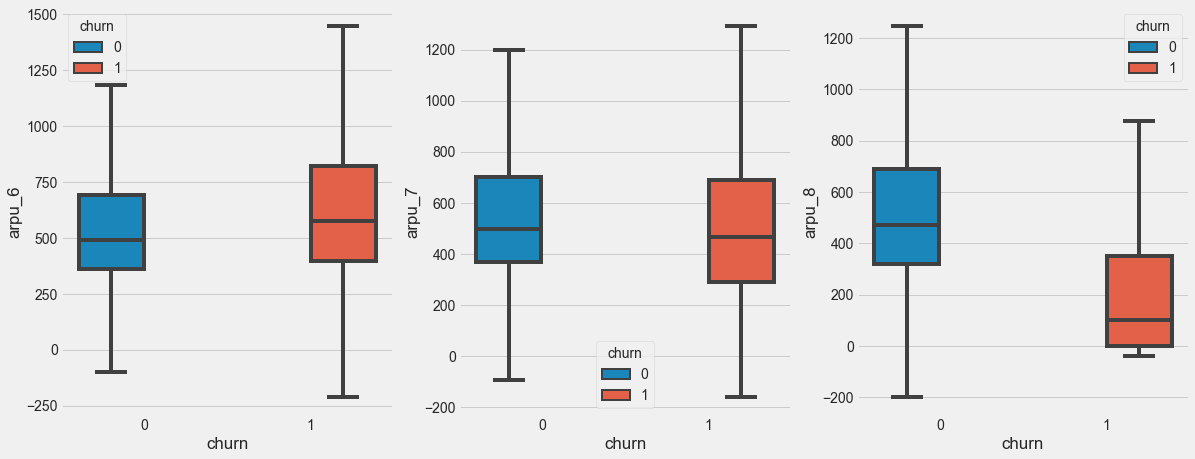

In [ ]:
box_plot_for_feature(high_value_customers_df,'total_rech_amt')
box_plot_for_feature(high_value_customers_df,'total_rech_num')
box_plot_for_feature(high_value_customers_df,'arpu')

**Observations**:
-   The recharge amounts drop in the last action month.
-   The frequency of recharge is also dropping towards the action phase for the customer who churned.
-   The average revenue also drops towars the action phase for churned customers

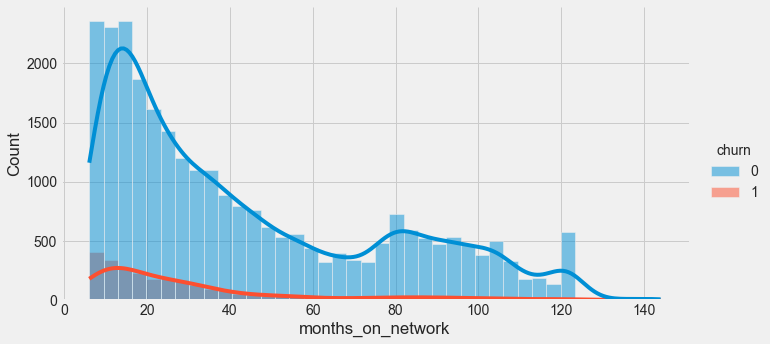

In [ ]:
sns.displot(data = high_value_customers_df,x = 'months_on_network',hue='churn',kde=True,bins = 40,aspect = 2)
plt.show()

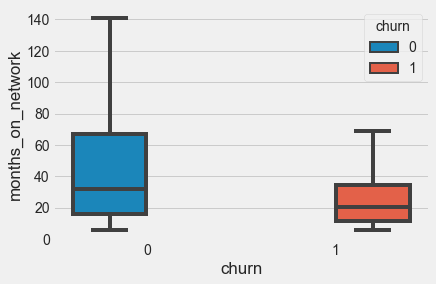

In [ ]:
sns.boxplot(data = high_value_customers_df, y = 'months_on_network' ,x="churn",hue="churn",showfliers=False)
plt.show()

As can be seen from the above plots, churners usually stay less than 50 months.<br>
Majority of the customers are on the network for 60 months or less.<br>
And the Customers who have churned are not that old in the network .<br>
So the churn usually happens when they are between 20 - 40 Months on the network.

# Bivariate analysis

In [ ]:
df_for_analysis = high_value_customers_df.copy()

In [ ]:
def feature_counts(df,feature,text,set_logscale=False):
    '''
        df: Dataframe
        feature: Column to group on
        text: Display Text for feature
        set_logscale: Set log scale for y-axis

        This function plots the sum of the target variable grouped by
        a categorical feature
    '''
    
    plt.figure(figsize=(10,7))
    plt.title(f'Top {feature} by count',fontsize = 18)
    
    ax =sns.countplot(data=df,x = feature,hue='churn')
   
    if set_logscale:
        ax.set_yscale("log")
    plt.ylabel('Count',fontsize = 18)
    plt.xlabel(text,fontsize = 18)
    plt.yticks(fontsize = 18)
    plt.xticks(rotation=90,fontsize = 16)
    plt.show()

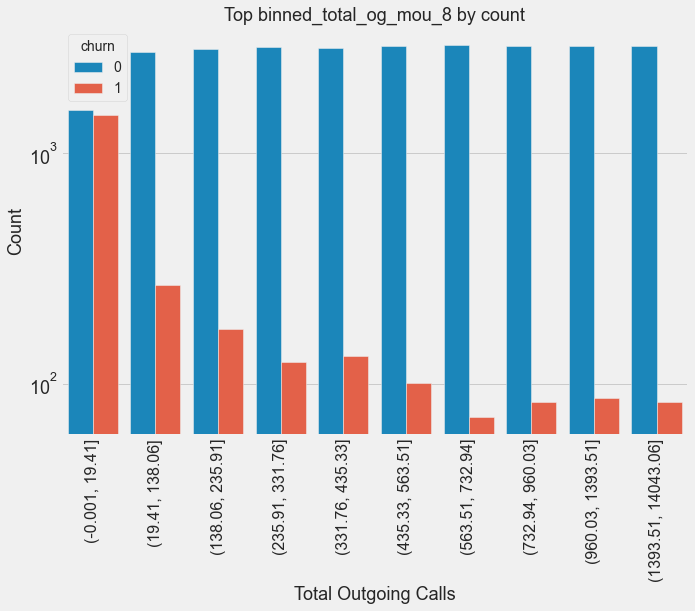

In [ ]:
# customers not using outgoing calls for september are likely to churn
df_for_analysis['binned_total_og_mou_8'] = pd.qcut(df_for_analysis['total_og_mou_8'], 10)
feature_counts(df_for_analysis,'binned_total_og_mou_8',text='Total Outgoing Calls',set_logscale=True)

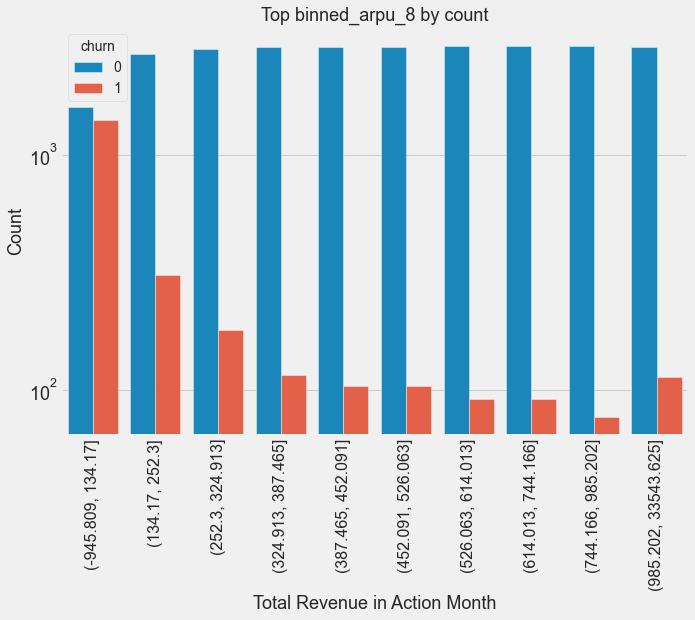

In [ ]:
# customers having low arpu in action period is likely to churn
df_for_analysis['binned_arpu_8'] = pd.qcut(df_for_analysis['arpu_8'], 10)
feature_counts(df_for_analysis,'binned_arpu_8',text='Total Revenue in Action Month',set_logscale=True)

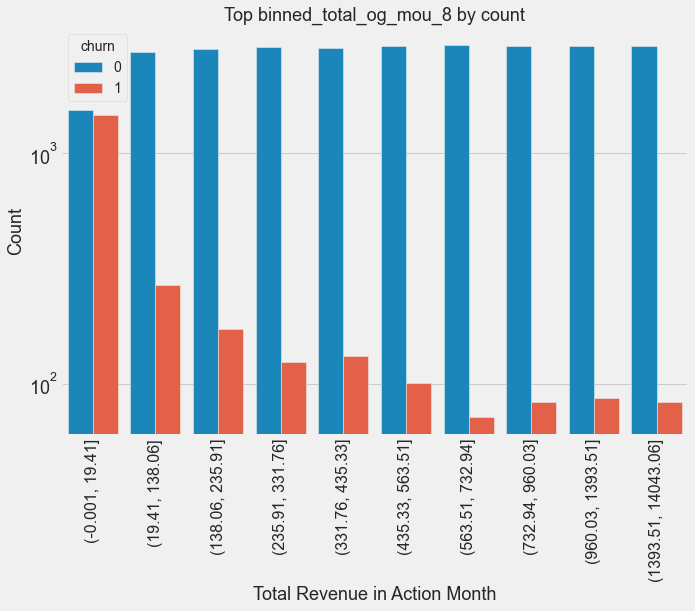

In [ ]:
# customers not using outgoing calls for september are likely to churn
df_for_analysis['binned_total_og_mou_8'] = pd.qcut(df_for_analysis['total_og_mou_8'], 10)
feature_counts(df_for_analysis,'binned_total_og_mou_8',text='Total Revenue in Action Month',set_logscale=True)

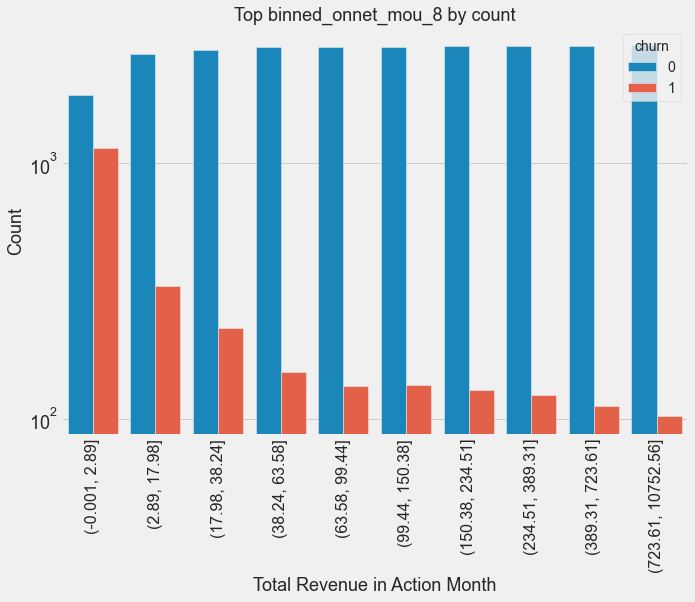

In [ ]:
# customers not using outgoing calls for september are likely to churn
df_for_analysis['binned_onnet_mou_8'] = pd.qcut(df_for_analysis['onnet_mou_8'], 10)
feature_counts(df_for_analysis,'binned_onnet_mou_8',text='Total Revenue in Action Month',set_logscale=True)

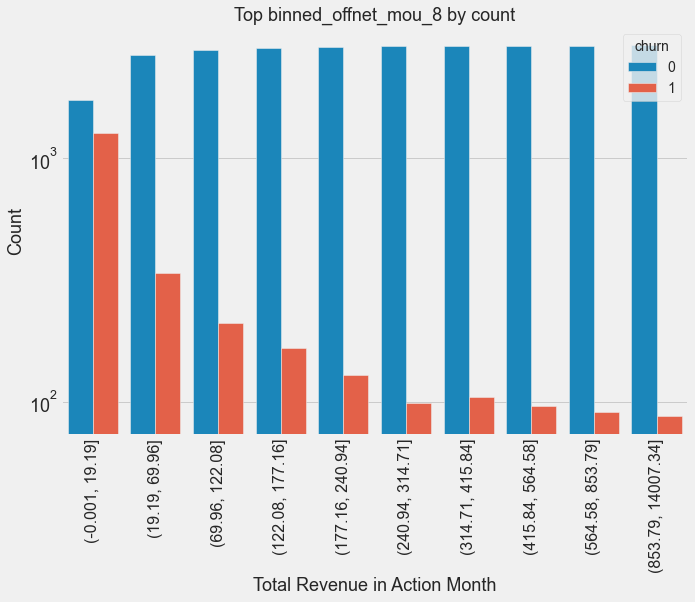

In [ ]:
# customers not using outgoing calls for september are likely to churn
df_for_analysis['binned_offnet_mou_8'] = pd.qcut(df_for_analysis['offnet_mou_8'], 10)
feature_counts(df_for_analysis,'binned_offnet_mou_8',text='Total Revenue in Action Month',set_logscale=True)

# Outlier Treatment

There must be data which are not significant in predicting the Churn customers in every column and presence of this data would give biased results. Hence we can do outlier treatment to remove such data

We consider any points to be Outliers that are 3 standard deviations away from the mean.

In [ ]:
pre_treatment = high_value_customers_df.index.size

In [ ]:
for col in high_value_customers_df.columns:
    col_values = high_value_customers_df[col]
    upper = col_values.mean() + 3*col_values.std()
    lower = col_values.mean() - 3*col_values.std()
    outliers = pd.Series([x for x in col_values if (x < lower) or (x > upper)])
    out_percent = (outliers.size/col_values.size) * 100
    if out_percent <= 0.3:
        print(f'Column: {col} -- outlier: {out_percent}%')
        high_value_customers_df = high_value_customers_df[(high_value_customers_df[col] >= lower) & (high_value_customers_df[col] <= upper)]

Column: og_others_7 -- outlier: 0.08330278897737496%
Column: og_others_8 -- outlier: 0.1300606949909958%
Column: arpu_ratio -- outlier: 0.20035395866029987%
Column: call_centre_ratio -- outlier: 0.2877505269849767%
Column: 2g_usage_ratio -- outlier: 0.130868091674776%
Column: ic_ratio -- outlier: 0.03359989248034406%
Column: months_on_network -- outlier: 0.09411132024737832%


In [ ]:
# % data retained after treatment
print(f'Percentage of data remaining after handling outliers: {(high_value_customers_df.index.size/pre_treatment) *100:.2f} %')

Percentage of data remaining after handling outliers: 99.04 %


## Modelling


- Converting data set into dependant and independant variables for building the models

In [ ]:
y = high_value_customers_df.pop('churn')
X = high_value_customers_df

### Splitting test/train data:
- We need to split the data into training and testing set. Models would be run on Training set and validated on testing data set later

In [ ]:
column_names = X.columns

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 42) 

### Balancing data:
- There will be imbalanced data present, which would give wrong results. We need to do resampling by SMOTE sampling

In [ ]:
X_train, y_train = SMOTE(random_state=42).fit_resample(X_train, y_train)
y_train =pd.Series(y_train)

### Scaling

In [ ]:
pt = PowerTransformer(method='yeo-johnson')
X_train = pd.DataFrame(pt.fit_transform(X_train))
X_test = pd.DataFrame(pt.transform(X_test))
X_train.columns=column_names
X_test.columns=column_names

### Using LassoCV to get the best indicators of churn

In [ ]:
reg = LassoCV(random_state=42)
reg.fit(X_train, y_train)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_train, y_train))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.000319
Best score using built-in LassoCV: 0.653841


In [ ]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 126 variables and eliminated the other 11 variables


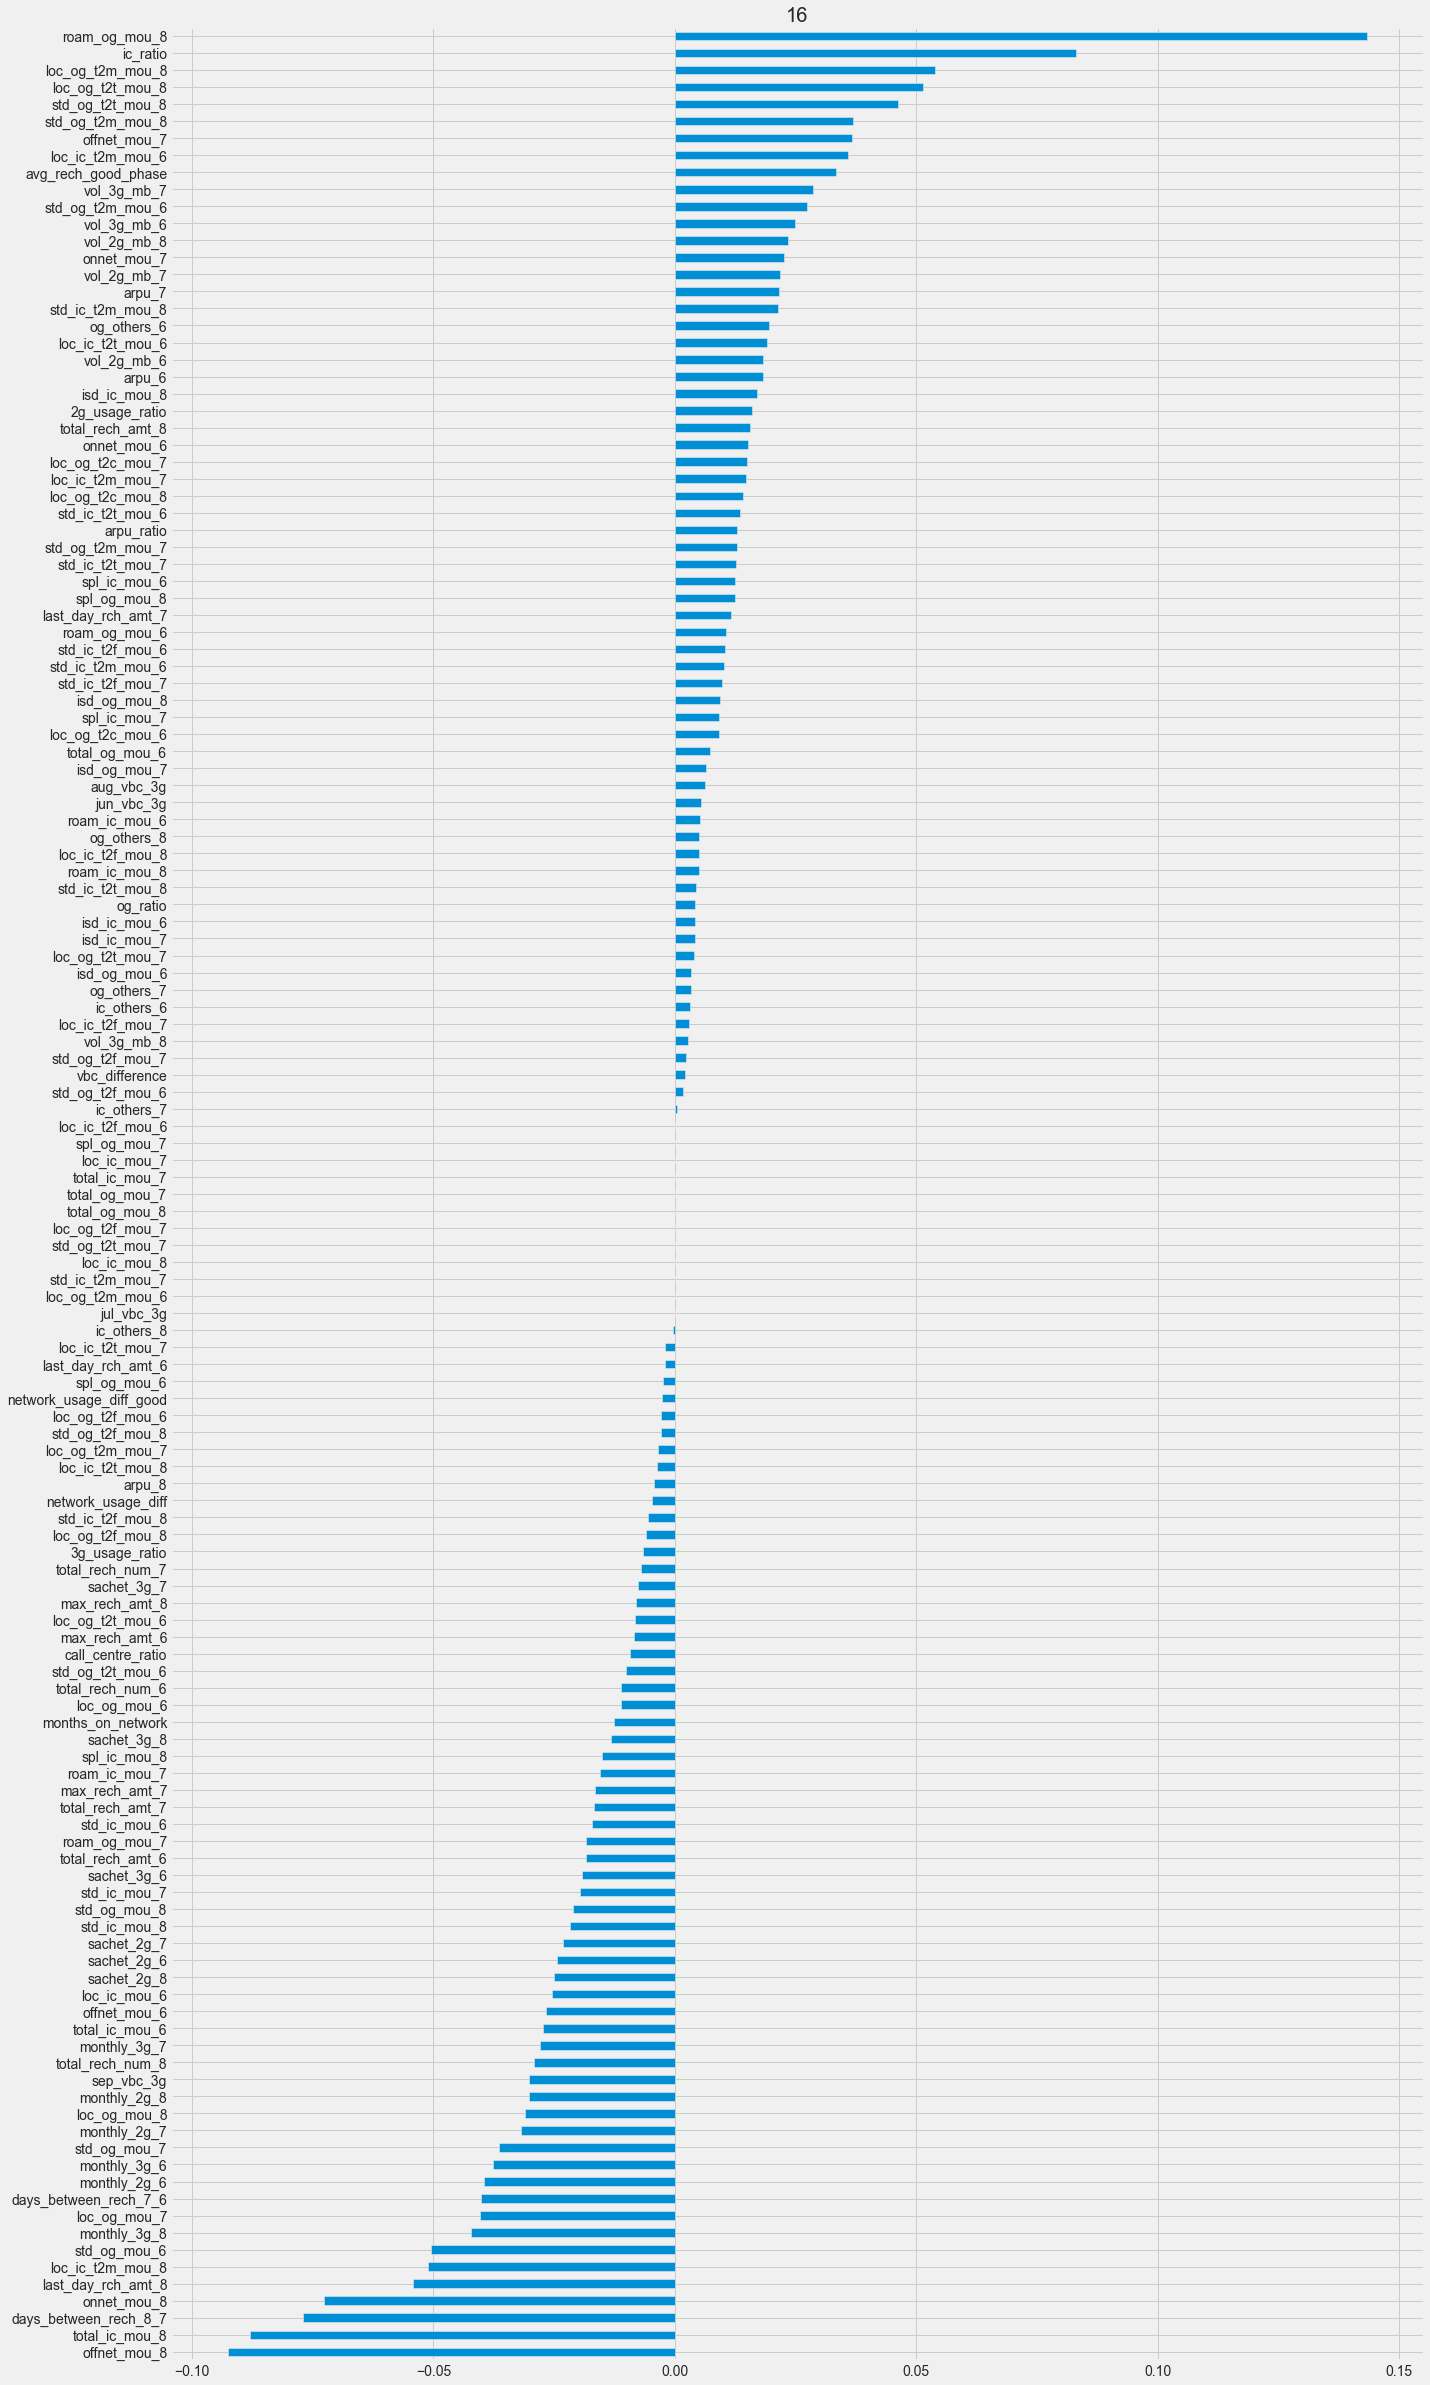

In [ ]:
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (20, 40)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model",text = 16)
plt.show()

In [ ]:
# The best indicators of churn in reverse order are:
imp_coef.tail(10)

vol_3g_mb_7           0.028623
avg_rech_good_phase   0.033347
loc_ic_t2m_mou_6      0.035758
offnet_mou_7          0.036712
std_og_t2m_mou_8      0.036774
std_og_t2t_mou_8      0.046246
loc_og_t2t_mou_8      0.051332
loc_og_t2m_mou_8      0.053918
ic_ratio              0.083094
roam_og_mou_8         0.143219
dtype: float64

In [ ]:
def fit_linear_model(df,labels):
    '''
     This function adds a constant to the input DF and 
     fits Logistic Regression Model
    '''
    df_with_const = sm.add_constant(df)
    lm = sm.GLM(labels,df_with_const, family = sm.families.Binomial()).fit()   # Running the linear model
    return lm 

def get_vif_for_features(df):
    '''
    This function creates a dataframe of VIF values and sorts in Descending order
    '''
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [ ]:
# Fit the linear Logistic Regression Model and get summary statistics
model = None

def show_model_statistics(features,labels):
    global model
    model = fit_linear_model(features,labels)
    print(model.summary())
    print()
    print('='*100)
    print()
    # Print the VIF for the selected features
    print('Variance Inflation Factor of Features')
    print('-'*50)
    print(get_vif_for_features(features))

show_model_statistics(features=X_train, labels=y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38040
Model:                            GLM   Df Residuals:                    37902
Model Family:                Binomial   Df Model:                          137
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8920.6
Date:                Sun, 24 Jan 2021   Deviance:                       17841.
Time:                        00:42:49   Pearson chi2:                 1.15e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

           Features        VIF
65     loc_ic_mou_8 197.870000
29     loc_og_mou_8 159.400000
64     loc_ic_mou_7 111.280000
28     loc_og_mou_7 102.710000
63     loc_ic_mou_6  99.100000
..              ...        ...
132  vbc_difference   1.230000
82     spl_ic_mou_7   1.150000
83     spl_ic_mou_8   1.140000
50      og_others_8   1.040000
49      og_others_7   1.030000

[137 rows x 2 columns]


### RFE

#### Recursive Feature Elimination is used for backward selection of the predictors

This technique begins by building a model on the entire set of predictors and computing an importance score for each predictor. The least important predictor(s) are then removed, the model is re-built, and importance scores are computed again.

In [ ]:
logreg = LogisticRegression(random_state=42)

In [ ]:
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [ ]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 15),
 ('arpu_7', False, 12),
 ('arpu_8', False, 58),
 ('onnet_mou_6', False, 73),
 ('onnet_mou_7', False, 46),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 17),
 ('offnet_mou_7', False, 24),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 78),
 ('roam_ic_mou_7', False, 29),
 ('roam_ic_mou_8', False, 82),
 ('roam_og_mou_6', False, 39),
 ('roam_og_mou_7', False, 91),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 94),
 ('loc_og_t2t_mou_7', False, 119),
 ('loc_og_t2t_mou_8', False, 4),
 ('loc_og_t2m_mou_6', False, 118),
 ('loc_og_t2m_mou_7', False, 25),
 ('loc_og_t2m_mou_8', False, 6),
 ('loc_og_t2f_mou_6', False, 87),
 ('loc_og_t2f_mou_7', False, 114),
 ('loc_og_t2f_mou_8', False, 112),
 ('loc_og_t2c_mou_6', False, 70),
 ('loc_og_t2c_mou_7', False, 68),
 ('loc_og_t2c_mou_8', False, 31),
 ('loc_og_mou_6', False, 56),
 ('loc_og_mou_7', False, 37),
 ('loc_og_mou_8', False, 5),
 ('std_og_t2t_mou_6', False, 74),
 ('std_og_t2t_mou_7', False, 123),
 ('

In [ ]:
col = X_train.columns[rfe.support_]
print(f'The selected columns after RFE are: {list(col)}')

The selected columns after RFE are: ['onnet_mou_8', 'offnet_mou_8', 'roam_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_mou_8', 'total_ic_mou_8', 'vol_2g_mb_6', 'monthly_2g_6', 'monthly_2g_8', 'sachet_2g_6', 'monthly_3g_8', 'sep_vbc_3g', 'ic_ratio', 'days_between_rech_8_7']


In [ ]:
not_selected_cols = X_train.columns[~rfe.support_]
print(f'The unselected columns after RFE are: {list(not_selected_cols)}') 

The unselected columns after RFE are: ['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6', 'offnet_mou_7', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t

### Model Assessment with stats model

In [ ]:
X_train = X_train[col]
show_model_statistics(features=X_train, labels=y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38040
Model:                            GLM   Df Residuals:                    38024
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11299.
Date:                Sun, 24 Jan 2021   Deviance:                       22598.
Time:                        00:44:44   Pearson chi2:                 6.47e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.10

## Confusion Metrics

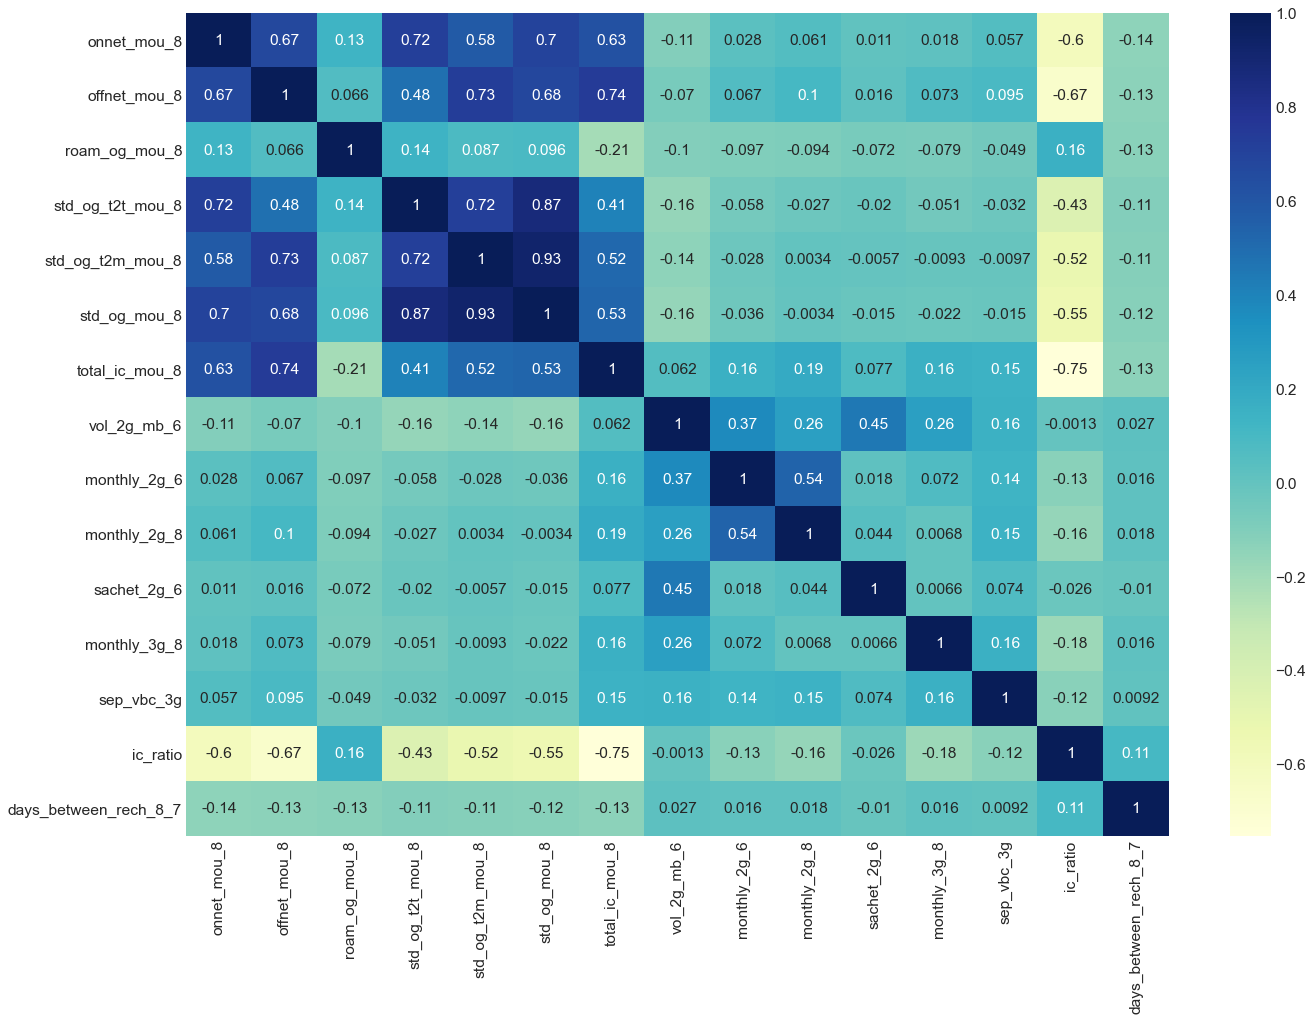

In [ ]:
plt.figure(figsize=(18,13), dpi=80, facecolor='w', edgecolor='k', frameon='True')

cor = X_train[col].corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

### Removal of variables and updation of the Model

Some of the variable have high VIFs although the p-value of them are in a good state. Those variables are insignificant and can be dropped.

In [ ]:
X_train = X_train.drop(['std_og_mou_8'], axis=1)
show_model_statistics(features=X_train, labels=y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38040
Model:                            GLM   Df Residuals:                    38025
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11391.
Date:                Sun, 24 Jan 2021   Deviance:                       22783.
Time:                        00:44:46   Pearson chi2:                 6.55e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.10

In [ ]:
X_train = X_train.drop(['offnet_mou_8'], axis=1)
show_model_statistics(features=X_train, labels=y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38040
Model:                            GLM   Df Residuals:                    38026
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11570.
Date:                Sun, 24 Jan 2021   Deviance:                       23140.
Time:                        00:44:47   Pearson chi2:                 6.81e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.09

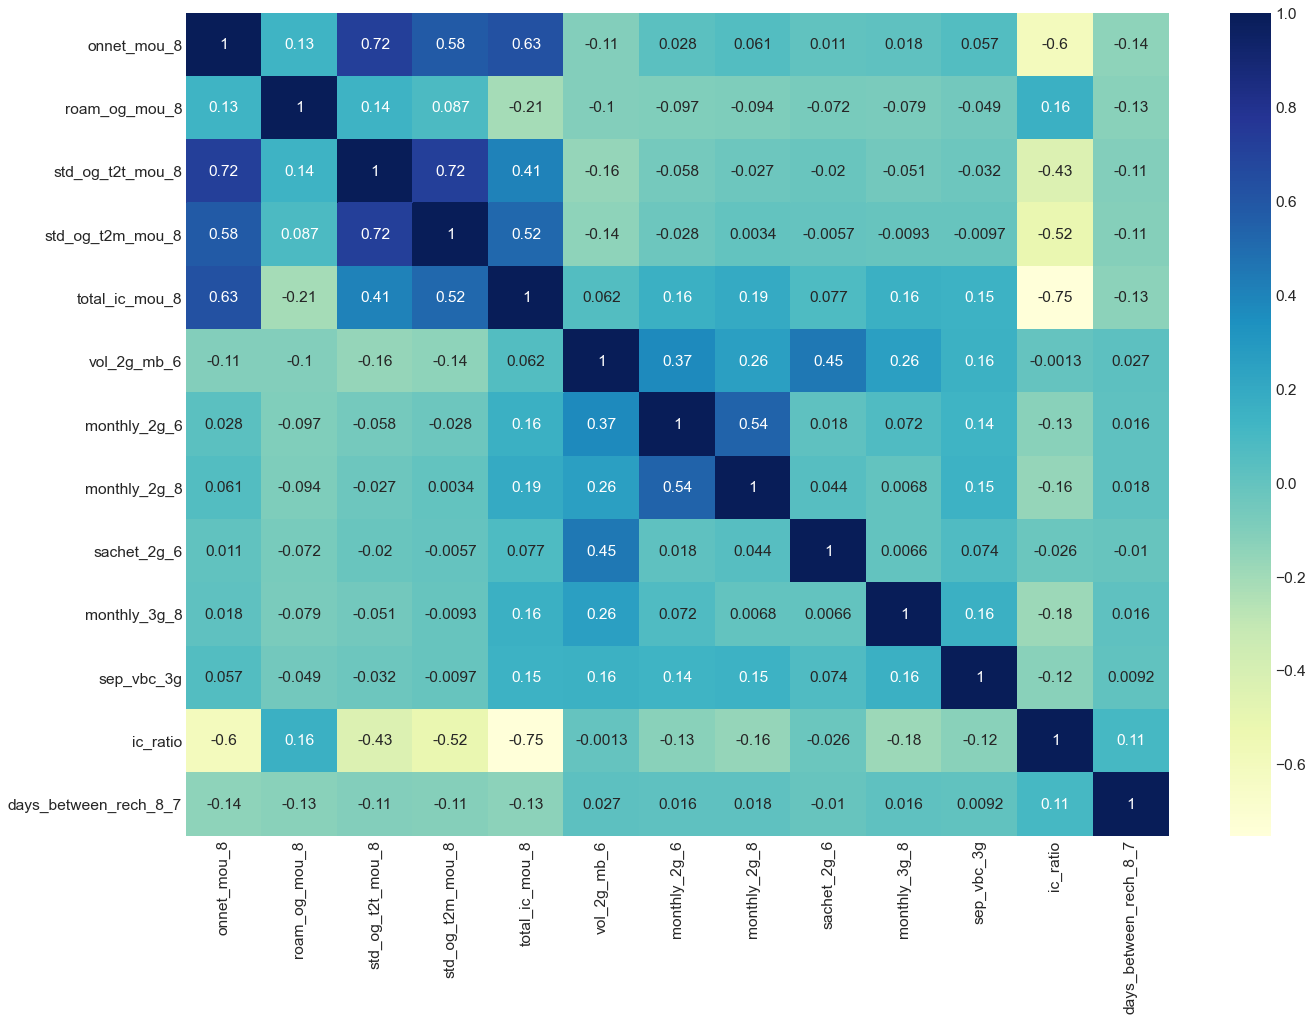

In [ ]:
plt.figure(figsize=(18,13), dpi=80, facecolor='w', edgecolor='k', frameon='True')

cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

## Model with Final Feature Set

In [ ]:
lr = LogisticRegression(random_state=100)
lr.fit(X_train,y_train)

X_test = X_test[X_train.columns]

y_probabilities_train = lr.predict_proba(X_train)[:,1]
y_probabilities_test = lr.predict_proba(X_test)[:,1]

In [ ]:
y_train_prob_label_df = pd.DataFrame({'probability':y_probabilities_train,'churn':y_train.values})
y_train_prob_label_df.head()

probability  churn
0     0.280312      0
1     0.604303      0
2     0.087669      0
3     0.834244      0
4     0.179722      0

In [ ]:
y_test_prob_label_df = pd.DataFrame({'probability':y_probabilities_test,'churn':y_test.values})
y_test_prob_label_df.head()

probability  churn
0     0.329386      0
1     0.000051      0
2     0.039934      0
3     0.124601      0
4     0.012251      0

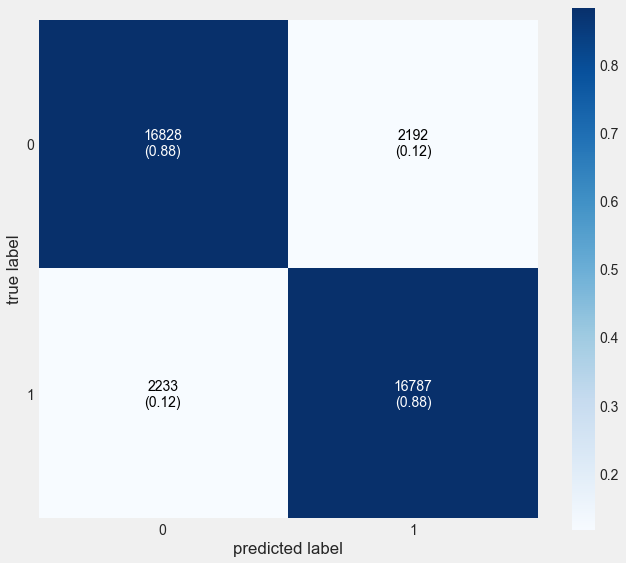

In [ ]:
y_train_prob_label_df['predicted_churn'] = y_train_prob_label_df.probability.map(lambda x: 1 if x > 0.5 else 0)
y_train_prob_label_df.head()

fig, ax = plot_confusion_matrix(conf_mat=metrics.confusion_matrix(y_train,y_train_prob_label_df.predicted_churn),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                figsize = (10,9))
plt.show()

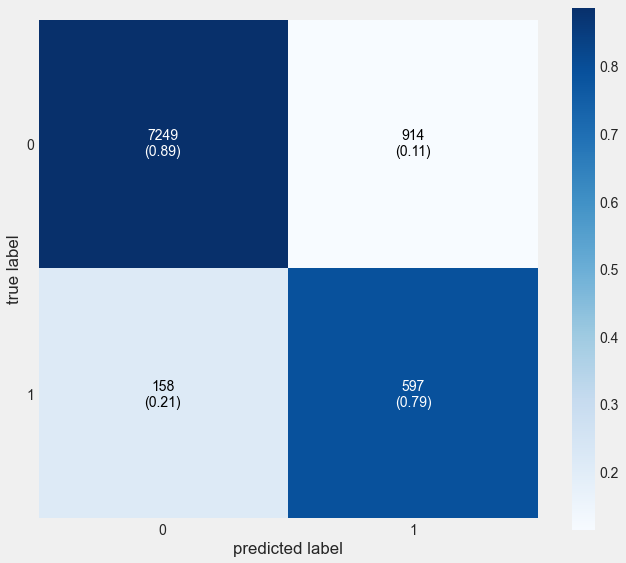

In [ ]:
y_test_prob_label_df['predicted_churn'] = y_test_prob_label_df.probability.map(lambda x: 1 if x > 0.5 else 0)
y_test_prob_label_df.head()

fig, ax = plot_confusion_matrix(conf_mat=metrics.confusion_matrix(y_test,y_test_prob_label_df.predicted_churn),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                figsize = (10,9))
plt.show()

In [ ]:
print(classification_report(y_test,y_test_prob_label_df.predicted_churn))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      8163
           1       0.40      0.79      0.53       755

    accuracy                           0.88      8918
   macro avg       0.69      0.84      0.73      8918
weighted avg       0.93      0.88      0.90      8918



We have got a decent f1-Score of 73% with Logistc Regression Model using the default prediction threshold. 

## Our latest models features are as follows:

1. All variables have p-values equal to 0.
2. All the features have very low VIF values (less than 5) that means there is less muliticollinearity among the features as per heat map.
3. The overall accuracy of 0.88 at a probability threshold of 0.5 is quite acceptable. So we shouldn't drop more variables and we should proceed with the predictions using this model.

### ROC Curve

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_test,y_test_prob_label_df.predicted_churn, drop_intermediate = False )

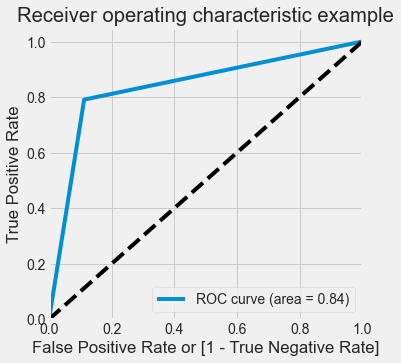

(array([0.        , 0.11196864, 1.        ]),
 array([0.        , 0.79072848, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [ ]:
draw_roc(y_test,y_test_prob_label_df.predicted_churn)

In [ ]:
print(f'The Area under the Curve: {metrics.roc_auc_score(y_test,y_test_prob_label_df.predicted_churn)*100:.2f} %')

The Area under the Curve: 83.94 %


## Finding the Probablity Cutoff Point

In [ ]:
# create columns with different probability cutoffs 
num = [float(x)/10 for x in range(10)]
for i in num:
    y_train_prob_label_df[i]= y_train_prob_label_df.probability.map(lambda x: 1 if x > i else 0)
y_train_prob_label_df.head()

probability  churn  predicted_churn  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0     0.280312      0                0    1    1    1    0    0    0    0   
1     0.604303      0                1    1    1    1    1    1    1    1   
2     0.087669      0                0    1    0    0    0    0    0    0   
3     0.834244      0                1    1    1    1    1    1    1    1   
4     0.179722      0                0    1    1    0    0    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    1    1    0  
4    0    0    0

In [ ]:
#calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_prob_label_df.churn, y_train_prob_label_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

             prob  accuracy    sensi    speci
0.000000 0.000000  0.500000 1.000000 0.000000
0.100000 0.100000  0.764984 0.985016 0.544953
0.200000 0.200000  0.841062 0.960147 0.721977
0.300000 0.300000  0.871767 0.938170 0.805363
0.400000 0.400000  0.882939 0.914038 0.851840
0.500000 0.500000  0.883675 0.882597 0.884753
0.600000 0.600000  0.877524 0.844479 0.910568
0.700000 0.700000  0.859359 0.785699 0.933018
0.800000 0.800000  0.827024 0.701682 0.952366
0.900000 0.900000  0.768218 0.565510 0.970925


#### Plot of the accuracy, sensitivity and specificity for various probabilities

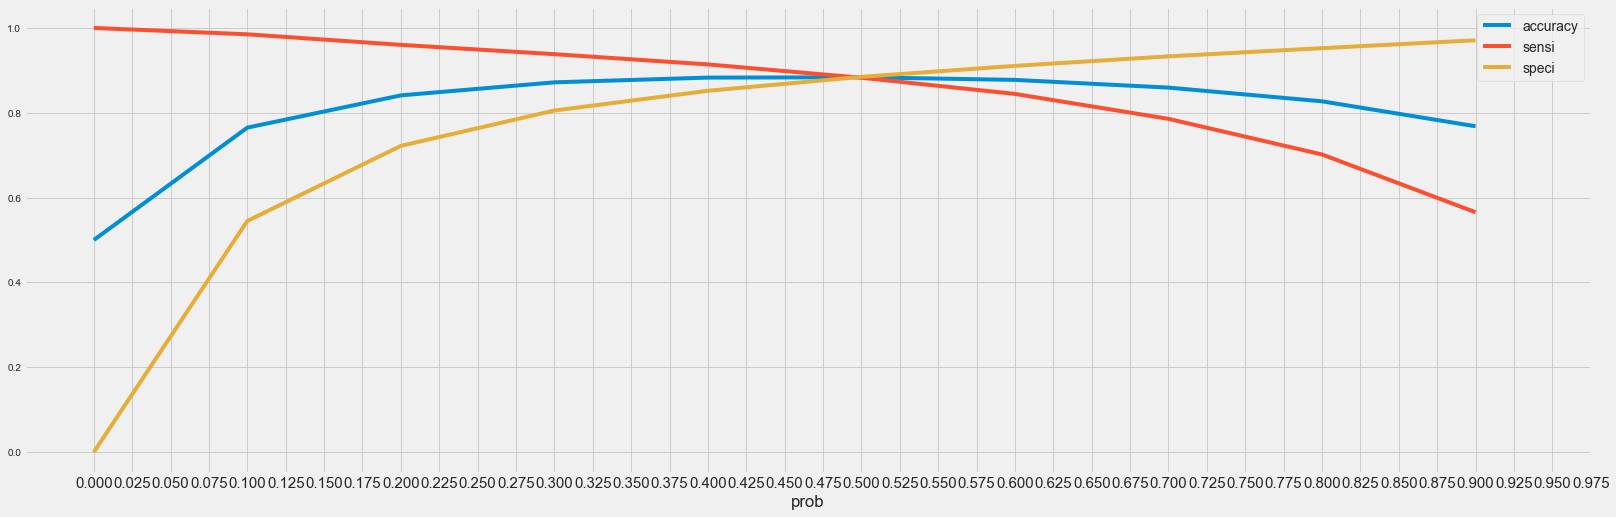

In [ ]:
#plt.figure(figsize=(60, 30))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(25,8))
#plt.xticks(np.arange(0, 1, step=0.05), size = 15)
plt.xticks(np.arange(0, 1, step=0.025), size = 15)                    
plt.yticks(size = 10)
plt.show()



### `0.5` is the optimum point to take it as a cutoff probability.

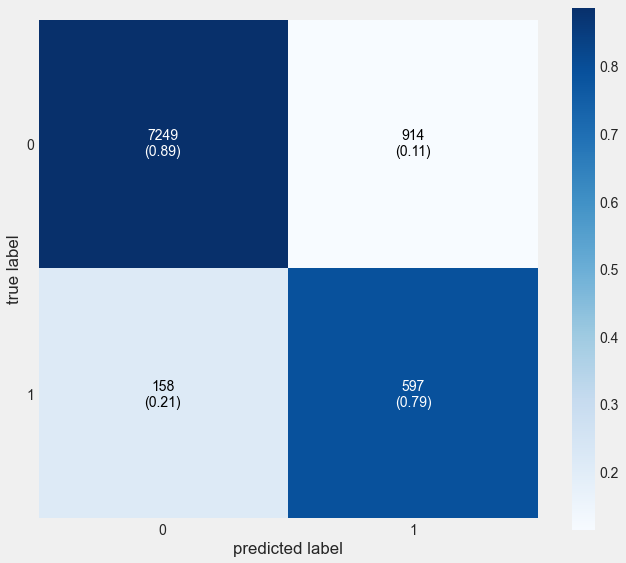

In [ ]:
y_test_prob_label_df['predicted_churn'] = y_test_prob_label_df.probability.map(lambda x: 1 if x > 0.5 else 0)
y_test_prob_label_df.head()

fig, ax = plot_confusion_matrix(conf_mat=metrics.confusion_matrix(y_test,y_test_prob_label_df.predicted_churn),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                figsize = (10,9))
plt.show()

In [ ]:
print(classification_report(y_test,y_test_prob_label_df.predicted_churn))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      8163
           1       0.40      0.79      0.53       755

    accuracy                           0.88      8918
   macro avg       0.69      0.84      0.73      8918
weighted avg       0.93      0.88      0.90      8918



In [ ]:
### Feature Importance
pd.options.display.float_format = '{:.2f}'.format
new_params = model.params[1:]
new_params

onnet_mou_8             -0.81
roam_og_mou_8            1.00
std_og_t2t_mou_8         0.53
std_og_t2m_mou_8        -0.22
total_ic_mou_8          -1.08
vol_2g_mb_6              0.68
monthly_2g_6            -0.61
monthly_2g_8            -0.65
sachet_2g_6             -0.49
monthly_3g_8            -0.68
sep_vbc_3g              -0.52
ic_ratio                 0.77
days_between_rech_8_7   -0.66
dtype: float64

In [ ]:
#feature_importance = abs(new_params)
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

onnet_mou_8              -80.79
roam_og_mou_8            100.00
std_og_t2t_mou_8          52.73
std_og_t2m_mou_8         -21.89
total_ic_mou_8          -108.15
vol_2g_mb_6               67.96
monthly_2g_6             -60.75
monthly_2g_8             -65.15
sachet_2g_6              -49.02
monthly_3g_8             -67.90
sep_vbc_3g               -52.03
ic_ratio                  77.42
days_between_rech_8_7    -66.36
dtype: float64

In [ ]:
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

onnet_mou_8               4
roam_og_mou_8             0
std_og_t2t_mou_8          9
std_og_t2m_mou_8         12
total_ic_mou_8            7
vol_2g_mb_6               6
monthly_2g_6             10
monthly_2g_8              8
sachet_2g_6               3
monthly_3g_8              2
sep_vbc_3g                5
ic_ratio                 11
days_between_rech_8_7     1
dtype: int64

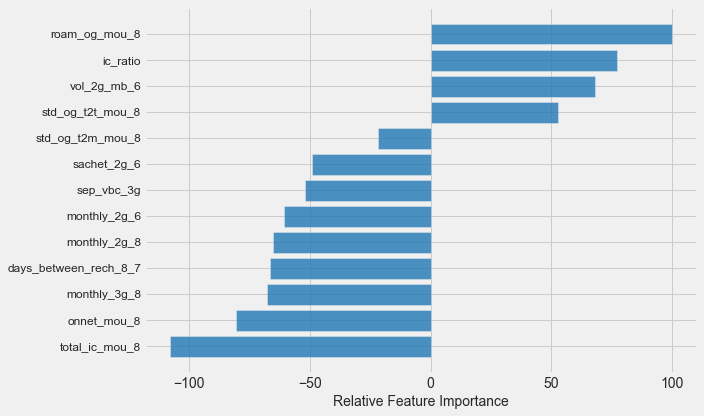

In [ ]:
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:blue',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train.columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

In [ ]:
### Top 3 feature selection.
pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)

index      0
1   roam_og_mou_8 100.00
11       ic_ratio  77.42
5     vol_2g_mb_6  67.96

In [ ]:
### Save Model Metrics for Performance Comparison

performance = pd.DataFrame(columns=('model','accuracy','recall','precision','f1','AUC'))

def save_model_metrics(model,y_true,y_pred,suffix=None):

    global performance
    performance_records = {}
    performance_records['model'] = model.__class__.__name__ + suffix if suffix else model.__class__.__name__ 
    performance_records['accuracy'] = metrics.accuracy_score(y_true,y_pred)
    performance_records['recall'] = metrics.recall_score(y_true,y_pred)
    performance_records['precision'] = metrics.precision_score(y_true,y_pred)
    performance_records['f1'] = metrics.f1_score(y_true,y_pred)
    performance_records['AUC'] =  metrics.roc_auc_score(y_true,y_pred)

    
   
    performance = performance.append(performance_records,ignore_index=True)

In [ ]:
save_model_metrics(lr,y_test,y_test_prob_label_df.predicted_churn,suffix='_RFE')
performance.head()

model  accuracy  recall  precision   f1  AUC
0  LogisticRegression_RFE      0.88    0.79       0.40 0.53 0.84

## XGBoost

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 42) 
X_train, y_train = SMOTE(random_state=42).fit_resample(X_train, y_train)
y_train = pd.Series(y_train)
column_names = X_train.columns

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train = pd.DataFrame(X_train,columns =  column_names)
X_test = pd.DataFrame(X_test,columns =  column_names)

In [ ]:
# XGBoost With Default Parameters

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

[00:44:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
save_model_metrics(xgb,y_test,y_pred,suffix = '_defaultparams')
performance.head()

model  accuracy  recall  precision   f1  AUC
0       LogisticRegression_RFE      0.88    0.79       0.40 0.53 0.84
1  XGBClassifier_defaultparams      0.94    0.64       0.63 0.63 0.80

With the default parameters we got a good F1-Score. Now we will try to tune the hyper parameters

In [ ]:
params = {
        'n_estimators' : [100, 200, 500,750],       
        'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.25],
        'min_child_weight': [1, 3, 5, 7, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 2, 5],
        'subsample': [0.1, 0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 10, 12],      
        'min_samples_leaf': range(30,71,10)  
    }

As this is a large search space, we will proceed with RandomizedSearchcv with the fine tuned search space.

In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
folds = 5
param_comb = 20  

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 42)

xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1 ,gpu_id =0,tree_method = 'gpu_hist')

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=-1, cv=skf.split(X_train,y_train), verbose=3, random_state=42 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train,y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 19.7min finished


[01:04:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[01:04:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 20 minutes and 1.91 seconds.


In [ ]:
print('\n Best hyperparameters:')
print(random_search.best_params_)

print('\n Best estimator:')
print(random_search.best_estimator_)


 Best hyperparameters:
{'subsample': 0.6, 'n_estimators': 200, 'min_samples_leaf': 40, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.8}

 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.1, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, min_samples_leaf=40, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=1, nthread=1,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, silent=True, subsample=0.6,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)


In [ ]:
xgb_tuned = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.1, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, min_samples_leaf=40,monotone_constraints='()',
              n_estimators=200, n_jobs=1, nthread=1, num_parallel_tree=1,
              random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, silent=True, subsample=0.6,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)

start_time = timer(None) # timing starts from this point for "start_time" variable
xgb_tuned.fit(X_train, y_train)
timer(start_time) # timing ends here for "start_time" variable

y_pred = xgb_tuned.predict(X_test)

[01:21:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[01:21:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 21.02 seconds.


In [ ]:
save_model_metrics(xgb_tuned,y_test,y_pred,suffix = '_xgb_tuned')
performance.head()

model  accuracy  recall  precision   f1  AUC
0       LogisticRegression_RFE      0.88    0.79       0.40 0.53 0.84
1  XGBClassifier_defaultparams      0.94    0.64       0.63 0.63 0.80
2      XGBClassifier_xgb_tuned      0.94    0.64       0.64 0.64 0.80

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8163
           1       0.64      0.64      0.64       755

    accuracy                           0.94      8918
   macro avg       0.80      0.80      0.80      8918
weighted avg       0.94      0.94      0.94      8918



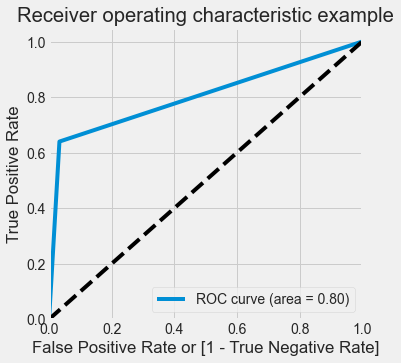

(array([0.        , 0.03307607, 1.        ]),
 array([0.       , 0.6397351, 1.       ]),
 array([2, 1, 0], dtype=int64))

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_test, y_pred, drop_intermediate = False )
draw_roc(y_test, y_pred)

## Explain the Model using SHAP (SHapley Additive exPlanations)

In [ ]:
# load JS visualization code to notebook
shap.initjs()

explainer = shap.TreeExplainer(xgb_tuned)
shap_values = explainer.shap_values(X_train)

# Visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

### The first prediction's explanation from the above SHAP plot

- The output value is the prediction for that observation (the prediction of the first row)
- Base value is the value that would be predicted if we did not know any features for the current output
- The value of `days_between_rech_8_7` has positive impact towards the prediction - it is higher than the avergae value in the dataset and thus pushes towards right.
- A lower than average `ic_ratio` on the other hand pushes towards left.

In [ ]:
X_df = pd.DataFrame(X_train,columns=X.columns)
X_df.head()

arpu_6  arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   -0.36   -1.44    0.17        -0.59        -0.62        -0.33   
1   -0.07    0.39    1.84        -0.20         0.07         0.82   
2   -0.37   -0.53    0.22        -0.28        -0.37        -0.24   
3   -0.13   -0.29   -0.56         0.37         0.17        -0.27   
4   -0.43   -0.39   -0.11        -0.58        -0.48        -0.36   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  \
0         -0.64         -0.71         -0.07          -0.22  ...   
1          0.40          0.91          1.90           4.93  ...   
2         -0.70         -0.64         -0.25           1.16  ...   
3         -0.51         -0.54         -0.55          -0.22  ...   
4         -0.23         -0.25          0.12          -0.22  ...   

   network_usage_diff_good  2g_usage_ratio  3g_usage_ratio  og_ratio  \
0                     0.05           -0.10            0.79     -0.36   
1                    -0.34           -0.21           -0.17     -0.36   
2                     0.29           -0.20           -0.17     -0.36   
3                     0.56           -0.21           -0.17     -0.35   
4                    -0.20           -0.01            0.62     -0.36   

   ic_ratio  vbc_difference  months_on_network  days_between_rech_7_6  \
0     -0.37            0.41              -0.54                   1.76   
1     -0.36           -0.07               0.36                   0.58   
2     -0.37           -0.05              -0.71                   0.08   
3     -0.36           -0.07               0.40                   0.25   
4     -0.37            1.60               1.62                  -0.09   

   days_between_rech_8_7  avg_rech_good_phase  
0                  -0.71                -0.01  
1                   0.01                 0.43  
2                   0.73                -0.38  
3                  -0.13                -0.30  
4                   0.73                -0.48  

[5 rows x 137 columns]

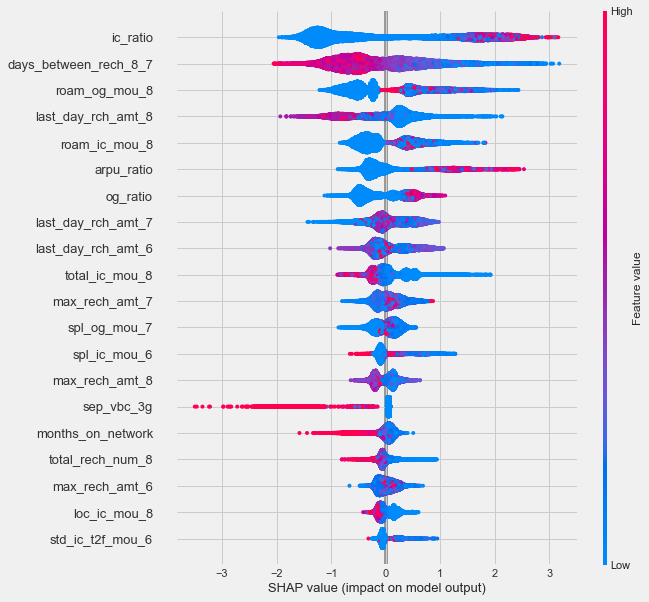

In [ ]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X_df)

This plot is made of all the dots in the train data. It demonstrates the following information:
-   __Feature importance__: Variables are ranked in descending order.
-   __Impact__: The horizontal location shows whether the effect of that value is associated with a higher or lower prediction.
-   __Original value__: Color shows whether that variable is high (in red) or low (in blue) for that observation.

### Mean absolute importance of each feature

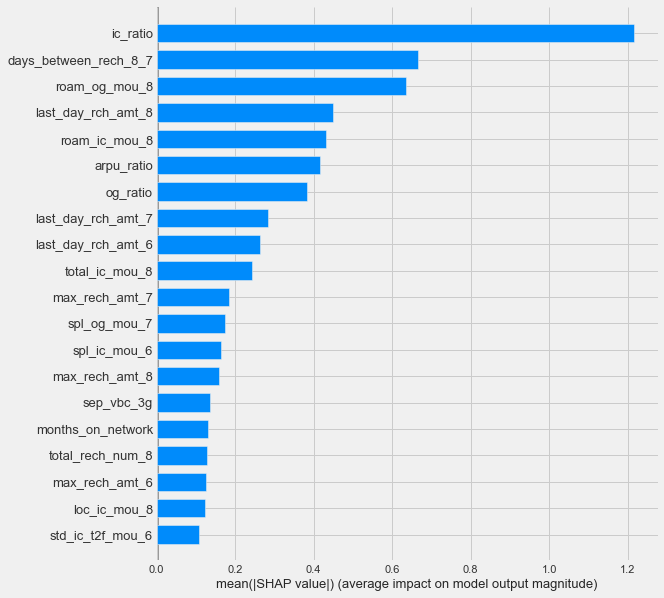

In [ ]:
shap.summary_plot(shap_values, X_df, plot_type="bar")

## Dimensionality Reduction using PCA

In [ ]:
pca = PCA(svd_solver='randomized', random_state=42)

<BarContainer object of 137 artists>

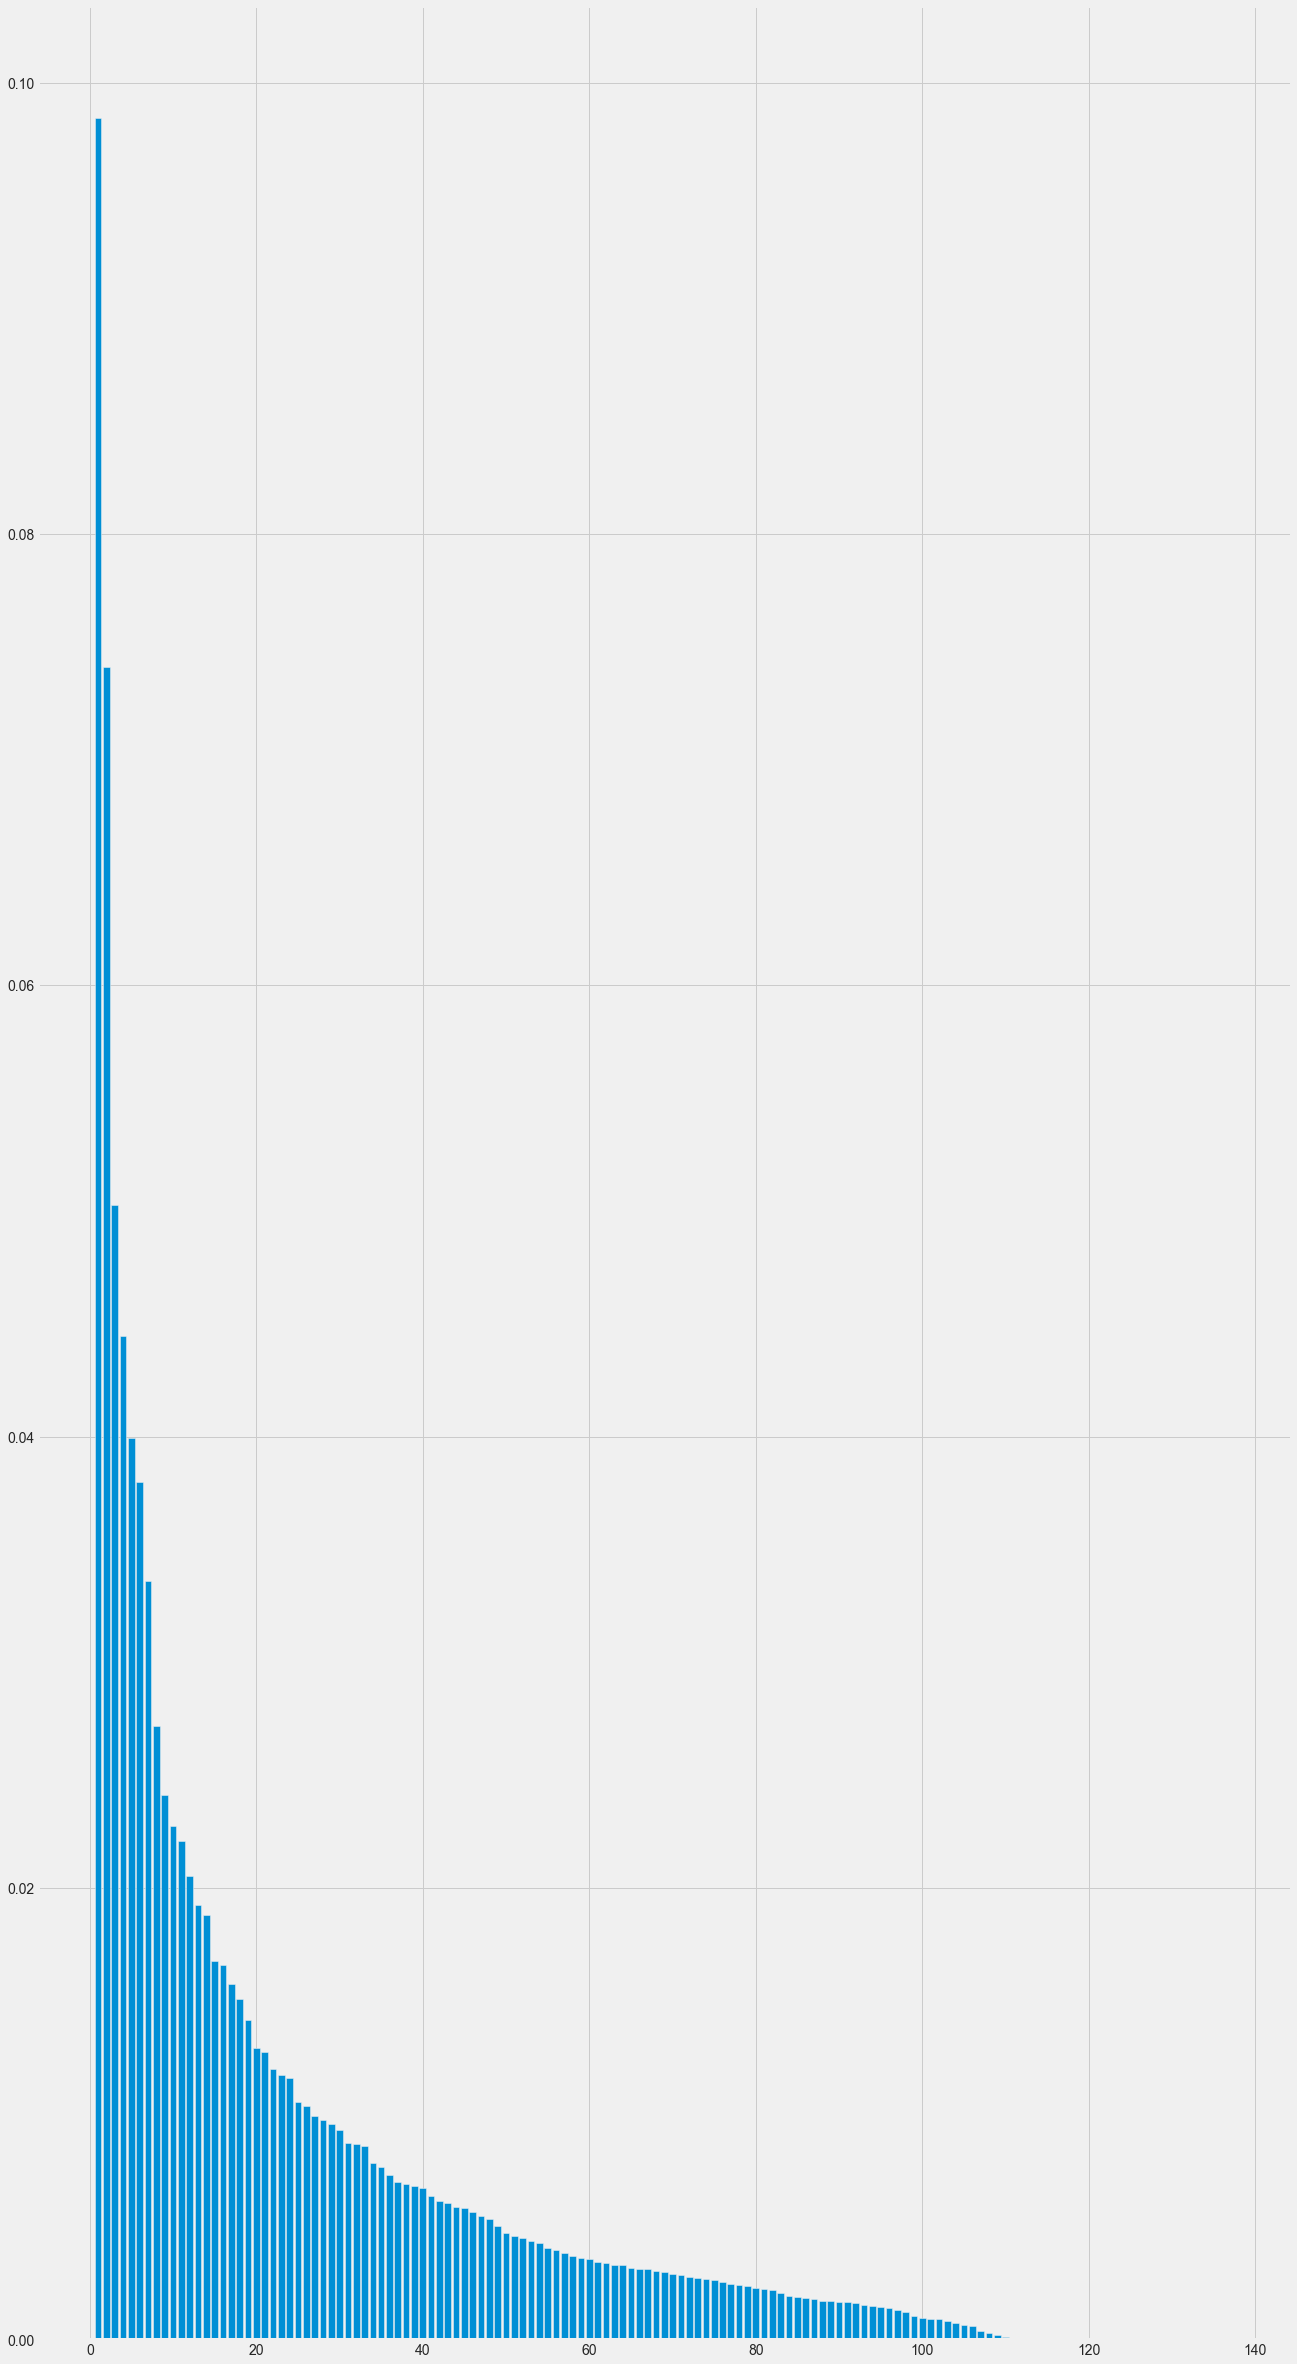

In [ ]:
X_train.head()
pca.fit(X_train)
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [ ]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 
                       'PC3':pca.components_[2],'PC4':pca.components_[3],
                       'PC5':pca.components_[4],'PC6':pca.components_[5],
                       'PC7':pca.components_[6],'PC8':pca.components_[7],
                       'PC9':pca.components_[8],'PC10':pca.components_[9],
                       'Feature':colnames})
pcs_df.head(10)

PC1  PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  PC10        Feature
0  0.08 0.10  0.07 -0.12 -0.09 -0.26  0.02  0.08  0.05  0.03         arpu_6
1  0.14 0.13  0.15 -0.03 -0.05 -0.05 -0.03  0.07  0.09 -0.03         arpu_7
2  0.18 0.10  0.16  0.04 -0.02  0.08 -0.06  0.06  0.03 -0.02         arpu_8
3  0.01 0.17 -0.08  0.17 -0.03 -0.22  0.00 -0.00 -0.01  0.02    onnet_mou_6
4  0.04 0.20 -0.04  0.24 -0.01 -0.11 -0.03 -0.02 -0.00 -0.01    onnet_mou_7
5  0.07 0.17 -0.01  0.25  0.00 -0.02 -0.05 -0.01 -0.04  0.02    onnet_mou_8
6  0.06 0.13 -0.05 -0.29 -0.08 -0.03  0.06 -0.03 -0.05  0.05   offnet_mou_6
7  0.10 0.16  0.01 -0.22 -0.05  0.13  0.01 -0.04 -0.05  0.00   offnet_mou_7
8  0.14 0.13  0.05 -0.12 -0.02  0.21 -0.03 -0.02 -0.07  0.00   offnet_mou_8
9 -0.00 0.00  0.07 -0.03  0.01 -0.04 -0.14  0.26 -0.12 -0.08  roam_ic_mou_6

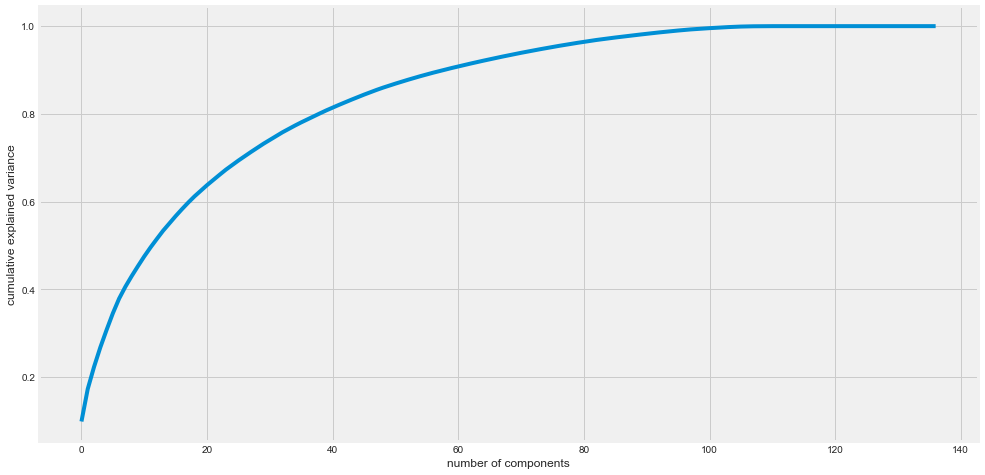

In [ ]:
%matplotlib inline
fig = plt.figure(figsize = (15,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### 90 components explain ~90% of variance in the data.

In [ ]:
pca_final = IncrementalPCA(n_components=90)

df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(38040, 90)

### Correlation matrix

In [ ]:
corrmat = np.corrcoef(df_train_pca.transpose())

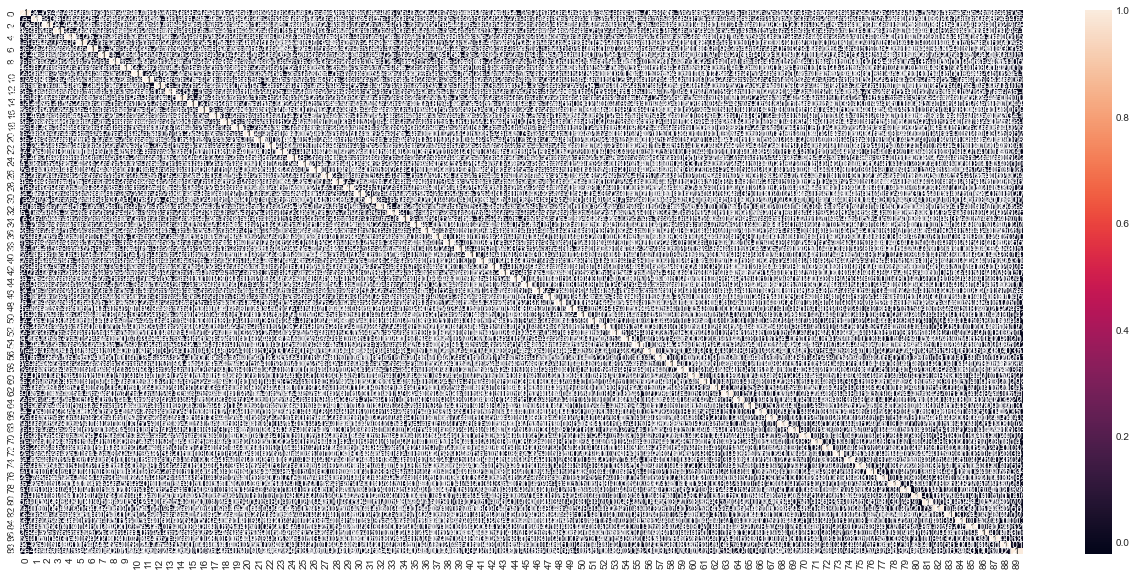

In [ ]:
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [ ]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# Observe that correlations are indeed very close to 0

max corr: 0.019019845875828903 , min corr:  -0.02147340137949191


In [ ]:
#Apply selected components to the test data
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8918, 90)

# RandomForestClassifier with PCA

In [ ]:
# Importing random forest classifier from sklearn library

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced',random_state=42)

# fit
rfc.fit(df_train_pca,y_train)

# Making predictions
y_pred_default = rfc.predict(df_test_pca)

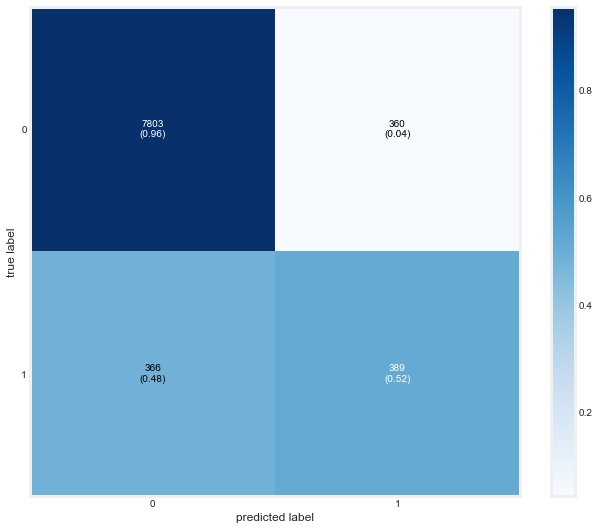

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=metrics.confusion_matrix(y_test,y_pred_default),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                figsize = (10,9))
plt.show()

In [ ]:
print(classification_report(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      8163
           1       0.52      0.52      0.52       755

    accuracy                           0.92      8918
   macro avg       0.74      0.74      0.74      8918
weighted avg       0.92      0.92      0.92      8918



### Hyperparameter tuning for RandomForest

In [ ]:
# GridSearchCV to find optimal max_depth

# number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

rf_with_pca = RandomForestClassifier(class_weight='balanced',random_state=42)


# fit tree on training data
rf_with_pca = GridSearchCV(rf_with_pca, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
rf_with_pca.fit(df_train_pca, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': range(2, 20, 5)}, return_train_score=True,
             scoring='accuracy')

In [ ]:
# scores of GridSearch CV
scores = rf_with_pca.cv_results_
pd.DataFrame(scores)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0           4.68          0.14             0.05            0.02   
1          14.18          0.49             0.08            0.01   
2          19.90          0.56             0.12            0.01   
3          22.45          0.16             0.12            0.00   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               2   {'max_depth': 2}               0.79               0.81   
1               7   {'max_depth': 7}               0.86               0.88   
2              12  {'max_depth': 12}               0.92               0.93   
3              17  {'max_depth': 17}               0.94               0.95   

   split2_test_score  split3_test_score  ...  mean_test_score  std_test_score  \
0               0.81               0.81  ...             0.80            0.01   
1               0.87               0.87  ...             0.87            0.01   
2               0.93               0.93  ...             0.93            0.00   
3               0.95               0.95  ...             0.95            0.00   

   rank_test_score  split0_train_score  split1_train_score  \
0                4                0.81                0.80   
1                3                0.88                0.88   
2                2                0.96                0.96   
3                1                0.99                0.99   

   split2_train_score  split3_train_score  split4_train_score  \
0                0.81                0.81                0.81   
1                0.88                0.89                0.89   
2                0.96                0.96                0.96   
3                0.99                0.99                0.99   

   mean_train_score  std_train_score  
0              0.81             0.00  
1              0.88             0.00  
2              0.96             0.00  
3              0.99             0.00  

[4 rows x 21 columns]

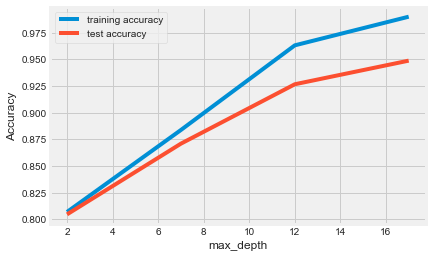

In [ ]:
# plot accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# Create the parameter grid for Grid search
param_grid = {
    'max_depth': range(8,16,2),
    'min_samples_leaf': range(100, 200, 100),
    'min_samples_split': range(200, 400, 200),
    'n_estimators': range(200, 400, 200), 
    'max_features': [8, 10, 12]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced',random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score' ,
                          cv = 5, n_jobs=-1, verbose = 1)

In [ ]:
# Fit the grid search to the data
grid_search.fit(df_train_pca, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  8.0min finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': range(8, 16, 2),
                         'max_features': [8, 10, 12],
                         'min_samples_leaf': range(100, 200, 100),
                         'min_samples_split': range(200, 400, 200),
                         'n_estimators': range(200, 400, 200)},
             refit='recall_score', verbose=1)

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of ',grid_search.best_score_,' using ',grid_search.best_params_)

We can get accuracy of  0.8732912723449001  using  {'max_depth': 14, 'max_features': 8, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


In [ ]:
# model with the best hyperparameters

rfc = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                             max_depth=14,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=8,
                             n_estimators=200,
                             random_state=42)

In [ ]:
# fit
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=14, max_features=8,
                       min_samples_leaf=100, min_samples_split=200,
                       n_estimators=200, random_state=42)

In [ ]:
# predict
y_pred_default = rfc.predict(df_test_pca)

In [ ]:
save_model_metrics(rfc,y_test,y_pred_default,suffix = '_rfc_tuned')
performance.head()

model  accuracy  recall  precision   f1  AUC
0            LogisticRegression_RFE      0.88    0.79       0.40 0.53 0.84
1       XGBClassifier_defaultparams      0.94    0.64       0.63 0.63 0.80
2           XGBClassifier_xgb_tuned      0.94    0.64       0.64 0.64 0.80
3  RandomForestClassifier_rfc_tuned      0.89    0.70       0.42 0.52 0.80

In [ ]:
# Classification Report of the Random Forest Classifier
print(classification_report(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      8163
           1       0.42      0.70      0.52       755

    accuracy                           0.89      8918
   macro avg       0.69      0.80      0.73      8918
weighted avg       0.92      0.89      0.90      8918



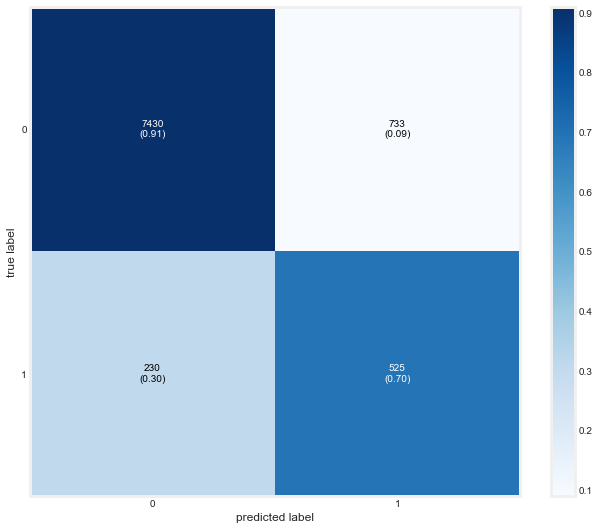

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=metrics.confusion_matrix(y_test,y_pred_default),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                figsize = (10,9))
plt.show()

### Top 5 churn indicators 

In [ ]:
feature_names=list(X_train.columns.values)
res = pd.DataFrame(list(dict(zip(feature_names, rfc.feature_importances_)).items()))
res.columns = ["Feature","Importance"]

In [ ]:
res.sort_values(by ="Importance").tail(5)

Feature  Importance
14     roam_og_mou_8        0.04
3        onnet_mou_6        0.04
16  loc_og_t2t_mou_7        0.05
5        onnet_mou_8        0.11
0             arpu_6        0.22

# Recommendation for Model Selection


- In this case study we are trying to predict which customers are at high risk of churn
- Identifying actual churners is more important rather than non-churners. Telecom company would need to take necessary measures to stop the churn. If some % of non-churners are identified as churners {i.e. False positive] that is not problem for the telecom company. Thus, **RECALL** is the most important performance metric that we need to look out for in our model apart from accuracy.

In [ ]:
performance.sort_values(by =["accuracy",'recall'],ascending=False).head()

model  accuracy  recall  precision   f1  AUC
2           XGBClassifier_xgb_tuned      0.94    0.64       0.64 0.64 0.80
1       XGBClassifier_defaultparams      0.94    0.64       0.63 0.63 0.80
3  RandomForestClassifier_rfc_tuned      0.89    0.70       0.42 0.52 0.80
0            LogisticRegression_RFE      0.88    0.79       0.40 0.53 0.84

- Logistic Regression(with Lasso and RFE) and Random Forest(with PCA) performed good for customer churn analysis for this particular dataset.
- LogisticRegression has an acuracy of 88%, RECALL of 0.79 and highest AUC (=0.84) compared to others
- AUC of rest 3 models are all 0.80
- RandomForest with PCA has an acuracy of 89%, RECALL of 0.70
- The XGBoost Classifier (Hyperparameter Tuned) produced the best result - highest recall, accuracy and F1 score. Thus, this is the recommended model for this churn analysis 
- With SHAP the effect of the features of the prediction by the XGBoost Classifier was checked and top 5 features are -
    - `ic_ratio` - Ratio of incoming calls between good phase and action phase
    - `days_between_rech_8_7` - Days between recharge of 8th and 7th month
    - `roam_og_mou_8` - Outgoing minutes of usage in 8th month while roaming
    - `last_day_rch_amt_8` - Last recharge amount in 8th month (Action phase month)
    - `roam_ic_mou_8` - Incoming call minutes of usage while roaming in 8th month

## Recommended strategies to manage customer churn

   - The telecom company needs to keep vigil on the action phase since the top 5 attributes are related to this period
   - Customer Churn is highly indicated by the gap of the days between 7th and 8th month. The company should try to provide some special offer during this period to retain the customer.
   - Outgoing minutes of usage and also Incoming call minutes of usage in 8th month while roaming plays an important role in churn prediction. Also, Last recharge amount in 8th month is an indicator that the customer is outside of his/her telecom circle and might eventually lead to churn. Telecom company must notify the customer about their service offerings and if needed provide special offers to the customer to retain their service in the roaming cycle.
   - Minutes of usage in both incoming and outgoing call plays an important role. Ensuring lower call drops and plans for higher minute usage can also lead to lower churn. Ensuring better network connectivity and higher bandwidth can lead to more volume consumption and hence lower churn.
   - Roaming minutes of usage for both incoming and outgoing are among the top 5 features of importance . Ensuring conditions that lead to higher usage like lower drop rates , free talktime plan etc can help out retain the customer.